In [683]:
# import required library
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  

## 1. 전처리 

### **데이터 불러오기**

In [684]:
# read data
aum_m7 = pd.read_csv('../data/rawdata/aum_train/aum_m7.csv')
aum_m8 = pd.read_csv('../data/rawdata/aum_train/aum_m8.csv')
aum_m9 = pd.read_csv('../data/rawdata/aum_train/aum_m9.csv')
aum_m10 = pd.read_csv('../data/rawdata/aum_train/aum_m10.csv')
aum_m11 = pd.read_csv('../data/rawdata/aum_train/aum_m11.csv')
aum_m12 = pd.read_csv('../data/rawdata/aum_train/aum_m12.csv')

behavior_m7 = pd.read_csv('../data/rawdata/behavior_train/behavior_m7.csv')
behavior_m8 = pd.read_csv('../data/rawdata/behavior_train/behavior_m8.csv')
behavior_m9 = pd.read_csv('../data/rawdata/behavior_train/behavior_m9.csv')
behavior_m10 = pd.read_csv('../data/rawdata/behavior_train/behavior_m10.csv')
behavior_m11 = pd.read_csv('../data/rawdata/behavior_train/behavior_m11.csv')
behavior_m12 = pd.read_csv('../data/rawdata/behavior_train/behavior_m12.csv')

big_event_Q3 = pd.read_csv('../data/rawdata/big_event_train/big_event_Q3.csv')
big_event_Q4 = pd.read_csv('../data/rawdata/big_event_train/big_event_Q4.csv')

cunkuan_m7 = pd.read_csv('../data/rawdata/cunkuan_train/cunkuan_m7.csv')
cunkuan_m8 = pd.read_csv('../data/rawdata/cunkuan_train/cunkuan_m8.csv')
cunkuan_m9 = pd.read_csv('../data/rawdata/cunkuan_train/cunkuan_m9.csv')
cunkuan_m10 = pd.read_csv('../data/rawdata/cunkuan_train/cunkuan_m10.csv')
cunkuan_m11 = pd.read_csv('../data/rawdata/cunkuan_train/cunkuan_m11.csv')
cunkuan_m12 = pd.read_csv('../data/rawdata/cunkuan_train/cunkuan_m12.csv')

cust_info_q3 = pd.read_csv('../data/rawdata/cust_info_train/cust_info_q3.csv')
cust_info_q4 = pd.read_csv('../data/rawdata/cust_info_train/cust_info_q4.csv')

y_Q3_3 = pd.read_csv('../data/rawdata/train_label/y_Q3_3.csv')
y_Q4_3 = pd.read_csv('../data/rawdata/train_label/y_Q4_3.csv')


/var/folders/1b/s6dx4hpn77n6jn657xm36s300000gn/T/ipykernel_5262/3554413285.py:16: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  big_event_Q3 = pd.read_csv('../data/rawdata/big_event_train/big_event_Q3.csv')


In [685]:
# print data shape
print("aum_m7 shape: ", aum_m7.shape)
print("aum_m8 shape: ", aum_m8.shape)
print("aum_m9 shape: ", aum_m9.shape)
print("aum_m10 shape: ", aum_m10.shape)
print("aum_m11 shape: ", aum_m11.shape)
print("aum_m12 shape: ", aum_m12.shape)

print("behavior_m7 shape: ", behavior_m7.shape)
print("behavior_m8 shape: ", behavior_m8.shape)
print("behavior_m9 shape: ", behavior_m9.shape)
print("behavior_m10 shape: ", behavior_m10.shape)
print("behavior_m11 shape: ", behavior_m11.shape)
print("behavior_m12 shape: ", behavior_m12.shape)

print("big_event_Q3 shape: ", big_event_Q3.shape)
print("big_event_Q4 shape: ", big_event_Q4.shape)

print("cunkuan_m7 shape: ", cunkuan_m7.shape)
print("cunkuan_m8 shape: ", cunkuan_m8.shape)
print("cunkuan_m9 shape: ", cunkuan_m9.shape)
print("cunkuan_m10 shape: ", cunkuan_m10.shape)
print("cunkuan_m11 shape: ", cunkuan_m11.shape)
print("cunkuan_m12 shape: ", cunkuan_m12.shape)

print("cust_info_q3 shape: ", cust_info_q3.shape)
print("cust_info_q4 shape: ", cust_info_q4.shape)

print("y_Q3_3 shape: ", y_Q3_3.shape)
print("y_Q4_3 shape: ", y_Q4_3.shape)

aum_m7 shape:  (465441, 9)
aum_m8 shape:  (479063, 9)
aum_m9 shape:  (493441, 9)
aum_m10 shape:  (506513, 9)
aum_m11 shape:  (521566, 9)
aum_m12 shape:  (543823, 9)
behavior_m7 shape:  (465441, 6)
behavior_m8 shape:  (479063, 6)
behavior_m9 shape:  (493441, 8)
behavior_m10 shape:  (506513, 6)
behavior_m11 shape:  (521566, 6)
behavior_m12 shape:  (543823, 8)
big_event_Q3 shape:  (493441, 19)
big_event_Q4 shape:  (543823, 19)
cunkuan_m7 shape:  (181220, 3)
cunkuan_m8 shape:  (190278, 3)
cunkuan_m9 shape:  (200711, 3)
cunkuan_m10 shape:  (209862, 3)
cunkuan_m11 shape:  (219928, 3)
cunkuan_m12 shape:  (237042, 3)
cust_info_q3 shape:  (493441, 21)
cust_info_q4 shape:  (543823, 21)
y_Q3_3 shape:  (69126, 2)
y_Q4_3 shape:  (76170, 2)


### **테이블 병합하기**

- 모든 테이블에서 label이 있는 데이터만 남기고 행 삭제. 즉, y_Q3_3, y_Q4_3에 존재하는 'cust_no'에 해당하지 않는 데이터 행 삭제

In [686]:
# y label merge and get cust_no in y_train
y_Q3_3.rename(columns={'cust_no':'cust_no', 'label':'label_Q3'}, inplace=True)
y_Q4_3.rename(columns={'cust_no':'cust_no', 'label':'label_Q4'}, inplace=True)
y_train = pd.merge(y_Q3_3, y_Q4_3, on='cust_no', how='outer')
y_train_idx = y_train.cust_no

In [687]:
# remove row data that not in y_train_idx

# aum table
aum_m7 = aum_m7[aum_m7.cust_no.isin(y_train_idx)]
aum_m8 = aum_m8[aum_m8.cust_no.isin(y_train_idx)]
aum_m9 = aum_m9[aum_m9.cust_no.isin(y_train_idx)]
aum_m10 = aum_m10[aum_m10.cust_no.isin(y_train_idx)]
aum_m11 = aum_m11[aum_m11.cust_no.isin(y_train_idx)]
aum_m12 = aum_m12[aum_m12.cust_no.isin(y_train_idx)]

# behavior table
behavior_m7 = behavior_m7[behavior_m7.cust_no.isin(y_train_idx)]
behavior_m8 = behavior_m8[behavior_m8.cust_no.isin(y_train_idx)]
behavior_m9 = behavior_m9[behavior_m9.cust_no.isin(y_train_idx)]
behavior_m10 = behavior_m10[behavior_m10.cust_no.isin(y_train_idx)]
behavior_m11 = behavior_m11[behavior_m11.cust_no.isin(y_train_idx)]
behavior_m12 = behavior_m12[behavior_m12.cust_no.isin(y_train_idx)]

# big_event table
big_event_Q3 = big_event_Q3[big_event_Q3.cust_no.isin(y_train_idx)]
big_event_Q4 = big_event_Q4[big_event_Q4.cust_no.isin(y_train_idx)]

# cunkuan table
cunkuan_m7 = cunkuan_m7[cunkuan_m7.cust_no.isin(y_train_idx)]
cunkuan_m8 = cunkuan_m8[cunkuan_m8.cust_no.isin(y_train_idx)]
cunkuan_m9 = cunkuan_m9[cunkuan_m9.cust_no.isin(y_train_idx)]
cunkuan_m10 = cunkuan_m10[cunkuan_m10.cust_no.isin(y_train_idx)]
cunkuan_m11 = cunkuan_m11[cunkuan_m11.cust_no.isin(y_train_idx)]
cunkuan_m12 = cunkuan_m12[cunkuan_m12.cust_no.isin(y_train_idx)]

# cust_info table
cust_info_q3 = cust_info_q3[cust_info_q3.cust_no.isin(y_train_idx)]
cust_info_q4 = cust_info_q4[cust_info_q4.cust_no.isin(y_train_idx)]


In [688]:
# rename for merge
aum_m7 = aum_m7.rename(columns={'X1':'X1_m7', 'X2':'X2_m7', 'X3':'X3_m7', 'X4':'X4_m7', 'X5':'X5_m7', 'X6':'X6_m7', 'X7':'X7_m7', 'X8':'X8_m7'})
aum_m8 = aum_m8.rename(columns={'X1':'X1_m8', 'X2':'X2_m8', 'X3':'X3_m8', 'X4':'X4_m8', 'X5':'X5_m8', 'X6':'X6_m8', 'X7':'X7_m8', 'X8':'X8_m8'})
aum_m9 = aum_m9.rename(columns={'X1':'X1_m9', 'X2':'X2_m9', 'X3':'X3_m9', 'X4':'X4_m9', 'X5':'X5_m9', 'X6':'X6_m9', 'X7':'X7_m9', 'X8':'X8_m9'})
aum_m10 = aum_m10.rename(columns={'X1':'X1_m10', 'X2':'X2_m10', 'X3':'X3_m10', 'X4':'X4_m10', 'X5':'X5_m10', 'X6':'X6_m10', 'X7':'X7_m10', 'X8':'X8_m10'})
aum_m11 = aum_m11.rename(columns={'X1':'X1_m11', 'X2':'X2_m11', 'X3':'X3_m11', 'X4':'X4_m11', 'X5':'X5_m11', 'X6':'X6_m11', 'X7':'X7_m11', 'X8':'X8_m11'})
aum_m12 = aum_m12.rename(columns={'X1':'X1_m12', 'X2':'X2_m12', 'X3':'X3_m12', 'X4':'X4_m12', 'X5':'X5_m12', 'X6':'X6_m12', 'X7':'X7_m12', 'X8':'X8_m12'})

behavior_m7 = behavior_m7.rename(columns={'B1':'B1_m7', 'B2':'B2_m7', 'B3':'B3_m7', 'B4':'B4_m7', 'B5':'B5_m7'})
behavior_m8 = behavior_m8.rename(columns={'B1':'B1_m8', 'B2':'B2_m8', 'B3':'B3_m8', 'B4':'B4_m8', 'B5':'B5_m8'})
behavior_m9 = behavior_m9.rename(columns={'B1':'B1_m9', 'B2':'B2_m9', 'B3':'B3_m9', 'B4':'B4_m9', 'B5':'B5_m9', 'B6':'B6_m9', 'B7':'B7_m9'})
behavior_m10 = behavior_m10.rename(columns={'B1':'B1_m10', 'B2':'B2_m10', 'B3':'B3_m10', 'B4':'B4_m10', 'B5':'B5_m10'})
behavior_m11 = behavior_m11.rename(columns={'B1':'B1_m11', 'B2':'B2_m11', 'B3':'B3_m11', 'B4':'B4_m11', 'B5':'B5_m11'})
behavior_m12 = behavior_m12.rename(columns={'B1':'B1_m12', 'B2':'B2_m12', 'B3':'B3_m12', 'B4':'B4_m12', 'B5':'B5_m12', 'B6':'B6_m12', 'B7':'B7_m12'})

cunkuan_m7 = cunkuan_m7.rename(columns = {'C1':'C1_m7', 'C2':'C2_m7'})
cunkuan_m8 = cunkuan_m8.rename(columns = {'C1':'C1_m8', 'C2':'C2_m8'})
cunkuan_m9 = cunkuan_m9.rename(columns = {'C1':'C1_m9', 'C2':'C2_m9'})
cunkuan_m10 = cunkuan_m10.rename(columns = {'C1':'C1_m10', 'C2':'C2_m10'})
cunkuan_m11 = cunkuan_m11.rename(columns = {'C1':'C1_m11', 'C2':'C2_m11'})
cunkuan_m12 = cunkuan_m12.rename(columns = {'C1':'C1_m12', 'C2':'C2_m12'})


big_event_Q3 = big_event_Q3.rename(columns = {'E1':'E1_Q3', 'E2':'E2_Q3', 'E3':'E3_Q3', 'E4':'E4_Q3',
                                              'E5':'E5_Q3', 'E6':'E6_Q3', 'E7':'E7_Q3', 'E8':'E8_Q3',
                                              'E9':'E9_Q3', 'E10':'E10_Q3', 'E11':'E11_Q3', 'E12':'E12_Q3',
                                              'E13':'E13_Q3', 'E14':'E14_Q3', 'E15':'E15_Q3', 'E16':'E16_Q3',
                                              'E17':'E17_Q3', 'E18':'E18_Q3'})
big_event_Q4 = big_event_Q4.rename(columns = {'E1':'E1_Q4', 'E2':'E2_Q4', 'E3':'E3_Q4', 'E4':'E4_Q4',
                                                'E5':'E5_Q4', 'E6':'E6_Q4', 'E7':'E7_Q4', 'E8':'E8_Q4',
                                                'E9':'E9_Q4', 'E10':'E10_Q4', 'E11':'E11_Q4', 'E12':'E12_Q4',
                                                'E13':'E13_Q4', 'E14':'E14_Q4', 'E15':'E15_Q4', 'E16':'E16_Q4',
                                                'E17':'E17_Q4', 'E18':'E18_Q4'})

cust_info_q3 = cust_info_q3.rename(columns = {'I1':'I1_Q3', 'I2':'I2_Q3', 'I3':'I3_Q3', 'I4':'I4_Q3',
                                    'I5':'I5_Q3', 'I6':'I6_Q3', 'I7':'I7_Q3', 'I8':'I8_Q3',
                                    'I9':'I9_Q3', 'I10':'I10_Q3', 'I11':'I11_Q3', 'I12':'I12_Q3',
                                    'I13':'I13_Q3', 'I14':'I14_Q3', 'I15':'I15_Q3', 'I16':'I16_Q3',
                                    'I17':'I17_Q3', 'I18':'I18_Q3', 'I19':'I19_Q3', 'I20':'I20_Q3'})
cust_info_q4 = cust_info_q4.rename(columns = {'I1':'I1_Q4', 'I2':'I2_Q4', 'I3':'I3_Q4', 'I4':'I4_Q4',
                                    'I5':'I5_Q4', 'I6':'I6_Q4', 'I7':'I7_Q4', 'I8':'I8_Q4',
                                    'I9':'I9_Q4', 'I10':'I10_Q4', 'I11':'I11_Q4', 'I12':'I12_Q4',
                                    'I13':'I13_Q4', 'I14':'I14_Q4', 'I15':'I15_Q4', 'I16':'I16_Q4',
                                    'I17':'I17_Q4', 'I18':'I18_Q4', 'I19':'I19_Q4', 'I20':'I20_Q4'})


In [689]:
# merge table

# aum
aum_m = pd.merge(aum_m7, aum_m8, on='cust_no', how='outer')
aum_m = pd.merge(aum_m, aum_m9, on='cust_no', how='outer')
aum_m = pd.merge(aum_m, aum_m10, on='cust_no', how='outer')
aum_m = pd.merge(aum_m, aum_m11, on='cust_no', how='outer')
aum_m = pd.merge(aum_m, aum_m12, on='cust_no', how='outer')

del aum_m7, aum_m8, aum_m9, aum_m10, aum_m11, aum_m12


# behavior
behavior_m = pd.merge(behavior_m7, behavior_m8, on='cust_no', how='outer')
behavior_m = pd.merge(behavior_m, behavior_m9, on='cust_no', how='outer')
behavior_m = pd.merge(behavior_m, behavior_m10, on='cust_no', how='outer')
behavior_m = pd.merge(behavior_m, behavior_m11, on='cust_no', how='outer')
behavior_m = pd.merge(behavior_m, behavior_m12, on='cust_no', how='outer')

del behavior_m7, behavior_m8, behavior_m9, behavior_m10, behavior_m11, behavior_m12

# cunkuan
cunkuan_m = pd.merge(cunkuan_m7, cunkuan_m8, on='cust_no', how='outer')
cunkuan_m = pd.merge(cunkuan_m, cunkuan_m9, on='cust_no', how='outer')
cunkuan_m = pd.merge(cunkuan_m, cunkuan_m10, on='cust_no', how='outer')
cunkuan_m = pd.merge(cunkuan_m, cunkuan_m11, on='cust_no', how='outer')
cunkuan_m = pd.merge(cunkuan_m, cunkuan_m12, on='cust_no', how='outer')

del cunkuan_m7, cunkuan_m8, cunkuan_m9, cunkuan_m10, cunkuan_m11, cunkuan_m12


# big_event
big_event_Q = pd.merge(big_event_Q3, big_event_Q4, on='cust_no', how='outer')

del big_event_Q3, big_event_Q4


# cust_info
cust_info_q = pd.merge(cust_info_q3, cust_info_q4, on='cust_no', how='outer')

del cust_info_q3, cust_info_q4

In [690]:
# check table shape
print(aum_m.shape)       # 82899
print(behavior_m.shape)  # 82899
print(cunkuan_m.shape)   # 82896
print(big_event_Q.shape) # 82899
print(cust_info_q.shape) # 82899

(82899, 49)
(82899, 35)
(82896, 13)
(82899, 37)
(82899, 41)


#### **aum table**

**변수 설명**
- X1 : structured deposit balance(구조화 예금 잔액)
    - 금리, 환률, 지수 등의 변동이나 기업의 신용에 연동된 금융파생상품을 시중은행이 흡수하여, 고객이 일정한 금액을 받아 그에 상응하는 수익을 얻을 수 있도록 하는 예금
- X2 : time deposit balance (정기 예금 잔액)
    - 적금과 비슷한 형태의 예금
- X3 : demand deposit balance (입출금 통장 잔액)
    - 은행에 사전 통지 없이 요청 시 인출할 수 있는 은행 예금
- X4 : financial products balance (금융 상품 잔액)
- X5 : fund balance (펀드 잔액)
- X6 : asset management balance (자산 관리 잔액)
- X7 : loan balance (대출 잔액)
- X8 : large deposit certificate balance (거액 예금 증서 잔액)
    - 일정 기간 동안 고정된 금액을 보유하고 그 대가로 개설 은행에서 이자를 지급하는 예금 계좌. 예금 증서(CD)를 현금으로 바꾸거나 상환하면 원래 투자한 금액과 이자를 받게 된다.


**결측치 형태**

| cust_no   | m7                                   | m8   | m9   | m10  | m11  | m12  |
|-----------|--------------------------------------|------|------|------|------|------|
| 7월 이전 고객  | data                                 | data | data | data | data | data |
| 8월 신규 고객  | <span style="color:red"> nan </span> | data | data | data | data | data |
| 9월 신규 고객  | <span style="color:red"> nan </span> | <span style="color:red"> nan </span> | data | data | data | data |
| 10월 신규 고객 | <span style="color:red"> nan </span> | <span style="color:red"> nan </span> |<span style="color:red"> nan </span> | data | data | data |
| 11월 신규 고객 | <span style="color:red"> nan </span> | <span style="color:red"> nan </span> | <span style="color:red"> nan </span>  | <span style="color:red"> nan </span> | data | data |
| 12월 신규 고객 | <span style="color:red"> nan </span>  | <span style="color:red"> nan </span>  | <span style="color:red"> nan </span>  | <span style="color:red"> nan </span>  | <span style="color:red"> nan </span> | data |
| 결측수 | 13485 | 10385 | 7132 | 4674 | 2239 | 0 |



**결측치 처리 방법**

- aum table 내의 변수는 은행 상품에 대한 잔액을 나타내는 변수이므로 새롭게 8월 이후에 들어온 신규 고객이 가진 결측치를 0으로 채우는 것이 타당하다고 판단함.



### **결측치 처리하기**

In [691]:
# check # of missing values by column
aum_m.isnull().sum()

cust_no        0
X1_m7      13485
X2_m7      13485
X3_m7      13485
X4_m7      13485
X5_m7      13485
X6_m7      13485
X7_m7      13485
X8_m7      13485
X1_m8      10385
X2_m8      10385
X3_m8      10385
X4_m8      10385
X5_m8      10385
X6_m8      10385
X7_m8      10385
X8_m8      10385
X1_m9       7132
X2_m9       7132
X3_m9       7132
X4_m9       7132
X5_m9       7132
X6_m9       7132
X7_m9       7132
X8_m9       7132
X1_m10      4674
X2_m10      4674
X3_m10      4674
X4_m10      4674
X5_m10      4674
X6_m10      4674
X7_m10      4674
X8_m10      4674
X1_m11      2239
X2_m11      2239
X3_m11      2239
X4_m11      2239
X5_m11      2239
X6_m11      2239
X7_m11      2239
X8_m11      2239
X1_m12         0
X2_m12         0
X3_m12         0
X4_m12         0
X5_m12         0
X6_m12         0
X7_m12         0
X8_m12         0
dtype: int64

In [692]:
# fill missing values with zeros
aum_m.fillna(0, inplace = True)

In [693]:
# check # of missing values by column
aum_m.isnull().sum()

cust_no    0
X1_m7      0
X2_m7      0
X3_m7      0
X4_m7      0
X5_m7      0
X6_m7      0
X7_m7      0
X8_m7      0
X1_m8      0
X2_m8      0
X3_m8      0
X4_m8      0
X5_m8      0
X6_m8      0
X7_m8      0
X8_m8      0
X1_m9      0
X2_m9      0
X3_m9      0
X4_m9      0
X5_m9      0
X6_m9      0
X7_m9      0
X8_m9      0
X1_m10     0
X2_m10     0
X3_m10     0
X4_m10     0
X5_m10     0
X6_m10     0
X7_m10     0
X8_m10     0
X1_m11     0
X2_m11     0
X3_m11     0
X4_m11     0
X5_m11     0
X6_m11     0
X7_m11     0
X8_m11     0
X1_m12     0
X2_m12     0
X3_m12     0
X4_m12     0
X5_m12     0
X6_m12     0
X7_m12     0
X8_m12     0
dtype: int64

#### **behavior table**

**변수 설명**
- B1 : mobile banking login times (로그인 횟수)
- B2 : transfer-in times (입금 횟수)
- B3 : transfer-in money amount (입금 금액)
- B4 : transfer-out times (출금 횟수)
- B5 : transfer-out money amount (출금 금액)
- B6 : latest transfer time (마지막 거래 시간) (type : date) (9, 12월에만 존재)
- B7 : number of transfers in a season (해당 시즌에 거래 횟수) (9, 12월에만 존재)

**결측치 형태(B1 ~ B5, B7)**

| cust_no   | m7                                   | m8   | m9   | m10  | m11  | m12  |
|-----------|--------------------------------------|------|------|------|------|------|
| 7월 이전 고객  | data                                 | data | data | data | data | data |
| 8월 신규 고객  | <span style="color:red"> nan </span> | data | data | data | data | data |
| 9월 신규 고객  | <span style="color:red"> nan </span> | <span style="color:red"> nan </span> | data | data | data | data |
| 10월 신규 고객 | <span style="color:red"> nan </span> | <span style="color:red"> nan </span> |<span style="color:red"> nan </span> | data | data | data |
| 11월 신규 고객 | <span style="color:red"> nan </span> | <span style="color:red"> nan </span> | <span style="color:red"> nan </span>  | <span style="color:red"> nan </span> | data | data |
| 12월 신규 고객 | <span style="color:red"> nan </span>  | <span style="color:red"> nan </span>  | <span style="color:red"> nan </span>  | <span style="color:red"> nan </span>  | <span style="color:red"> nan </span> | data |
| 결측수 | 13485 | 10385 | 7132 | 4674 | 2239 | 0 |



**결측치 처리 방법(B1 ~ B5, B7)**

- behavior table 내의 변수는 은행을 사용한 행동의 횟수, 행동에 대한 금액을 나타내는 변수이므로 새롭게 8월 이후에 들어온 신규 고객이 가진 결측치를 0으로 채우는 것이 타당하다고 판단함.

**결측치 처리 방법(B6)**

- B6 변수는 마지막 거래 날짜를 의미하므로 B2, B4가 0이 아닌 마지막 시점으로 결측치를 대체한다.



In [694]:
behavior_m.isna().sum()

cust_no        0
B1_m7      13485
B2_m7      13485
B3_m7      13485
B4_m7      13485
B5_m7      13485
B1_m8      10385
B2_m8      10385
B3_m8      10385
B4_m8      10385
B5_m8      10385
B1_m9       7132
B2_m9       7132
B3_m9       7132
B4_m9       7132
B5_m9       7132
B6_m9      13909
B7_m9       7132
B1_m10      4674
B2_m10      4674
B3_m10      4674
B4_m10      4674
B5_m10      4674
B1_m11      2239
B2_m11      2239
B3_m11      2239
B4_m11      2239
B5_m11      2239
B1_m12         0
B2_m12         0
B3_m12         0
B4_m12         0
B5_m12         0
B6_m12      3932
B7_m12         0
dtype: int64

In [695]:
# Q. B7변수가 해당 분기의 3개월 간의 B2, B4 변수의 단순 합인가? (no)
# behavior_m[['B1_m7','B1_m8','B1_m9','B2_m7', 'B2_m8', 'B2_m9', 'B4_m7', 'B4_m8', 'B4_m9','B7_m9']]

In [696]:
# B6 : B2, B4가 0이 아닌 마지막 달의 1일로 결측치 채우기

def fill_last_month7to9(row_data):
    l_month = 7
    for m in range(7, 10):
        value1 = eval('row_data.B2_m' + str(m))
        value2 = eval("row_data.B4_m" + str(m))
        if ((value1 != 0) and (str(value1) != 'nan')) | ((value2 != 0) and (str(value2) != 'nan')):
            l_month = m
    return pd.datetime(2019, l_month, 1).strftime("%Y-%m-%d %H:%M:%S")


def fill_last_month7to12(row_data):
    l_month = 7
    for m in range(7, 12):
        value1 = eval('row_data.B2_m' + str(m))
        value2 = eval("row_data.B4_m" + str(m))
        if ((value1 != 0) and (str(value1) != 'nan')) | ((value2 != 0) and (str(value2) != 'nan')):
            l_month = m
    return pd.datetime(2019, l_month, 1).strftime("%Y-%m-%d %H:%M:%S")


In [697]:
behavior_m.loc[behavior_m.B6_m9.isna(), 'B6_m9'] = behavior_m[behavior_m.B6_m9.isna()].apply(fill_last_month7to9, axis = 1)
behavior_m.loc[behavior_m.B6_m12.isna(), 'B6_m12'] = behavior_m[behavior_m.B6_m12.isna()].apply(fill_last_month7to12, axis=1)

In [698]:
# fill missing data with zeros
behavior_m.fillna(0,inplace = True)

In [699]:
# behavior_m[['B6_m9','B6_m12']]

In [700]:
# check missing data
behavior_m.isna().sum()

cust_no    0
B1_m7      0
B2_m7      0
B3_m7      0
B4_m7      0
B5_m7      0
B1_m8      0
B2_m8      0
B3_m8      0
B4_m8      0
B5_m8      0
B1_m9      0
B2_m9      0
B3_m9      0
B4_m9      0
B5_m9      0
B6_m9      0
B7_m9      0
B1_m10     0
B2_m10     0
B3_m10     0
B4_m10     0
B5_m10     0
B1_m11     0
B2_m11     0
B3_m11     0
B4_m11     0
B5_m11     0
B1_m12     0
B2_m12     0
B3_m12     0
B4_m12     0
B5_m12     0
B6_m12     0
B7_m12     0
dtype: int64

#### **cunkuan table**

**변수 설명**
- C1 : deposit products value (예금 상품 가치)
    - 결측치 0으로 대체
- C2 : number of deposit products (예금 상품 수)
    - 결측치 0으로 대체

**결측치 형태**

| cust_no   | m7                                   | m8                                   | m9                                   | m10                                  | m11                                  | m12  |
|-----------|--------------------------------------|--------------------------------------|--------------------------------------|--------------------------------------|--------------------------------------|------|
| 7월 이전 고객  | data                                 | data                                 | data                                 | data                                 | data                                 | data |
| 8월 신규 고객  | <span style="color:red"> nan </span> | data                                 | data                                 | data                                 | data                                 | data |
| 9월 신규 고객  | <span style="color:red"> nan </span> | <span style="color:red"> nan </span> | data                                 | data                                 | data                                 | data |
| 10월 신규 고객 | <span style="color:red"> nan </span> | <span style="color:red"> nan </span> | <span style="color:red"> nan </span> | data                                 | data                                 | data |
| 11월 신규 고객 | <span style="color:red"> nan </span> | <span style="color:red"> nan </span> | <span style="color:red"> nan </span> | <span style="color:red"> nan </span> | data                                 | data |
| 12월 신규 고객 | <span style="color:red"> nan </span> | <span style="color:red"> nan </span> | <span style="color:red"> nan </span> | <span style="color:red"> nan </span> | <span style="color:red"> nan </span> | data |
| 결측수 | 15296 | 12157 | 8623  | 5803 | 2822 | 0 |



**결측치 처리 방법**

- cunkuan table 내의 변수는 예금 상품 가치 상품 수를 나타내는 변수이므로 새롭게 8월 이후에 들어온 신규 고객이 가진 결측치를 0으로 채우는 것이 타당하다고 판단함.



In [701]:
# check missing values
cunkuan_m.isna().sum()

cust_no        0
C1_m7      15296
C2_m7      15296
C1_m8      12157
C2_m8      12157
C1_m9       8623
C2_m9       8623
C1_m10      5803
C2_m10      5803
C1_m11      2822
C2_m11      2822
C1_m12         0
C2_m12         0
dtype: int64

In [702]:
# fill missing values with zeros
cunkuan_m.fillna(0, inplace=True)

In [703]:
# check missing values
cunkuan_m.isna().sum()

cust_no    0
C1_m7      0
C2_m7      0
C1_m8      0
C2_m8      0
C1_m9      0
C2_m9      0
C1_m10     0
C2_m10     0
C1_m11     0
C2_m11     0
C1_m12     0
C2_m12     0
dtype: int64

#### **big_event table**

**변수 설명**

- E1 : account opening date (계좌 오픈 날짜)
- E2 : online banking opening date (온라인 뱅킹 오픈 날짜)
- E3 : mobile banking opening date (모바일 뱅킹 오픈 날짜)
- E4 : first online banking login date (첫번째 온라인 뱅킹 로그인 날짜)
- E5 : first mobile banking login date (첫번째 모바일 뱅킹 로그인 날짜)
- E6 : first demand deposit date (첫번째 입출금 날짜)
- E7 : first time deposit date (최초 입금 일)
- E8 : first loan date (최초 대출 일)
- E9 : first overdue date (최초 연체 날짜)
- E10 : first cash transaction date (최초 현금 거래일)
- E11 : first bank-securities transfer date (최초 은행 - 증권 이체 날짜)
- E12 : first transfer at counter date (최초 카운터에서 이체 날짜)
- E13 : first transfer via online banking date (온라인 뱅킹을 이용한 최초 이체 날짜)
- E14 : first transfer via mobile banking date (모바일 뱅킹을 이용한 최초 이체 날짜)
- E15 : maximum amount transferred out of another bank (다른 은행에서 이체된 최대 금액)
- E16 : maximum amount transferred out of another bank date (다른 은행에서 이체된 최대 금액이 이체된 날짜)
- E17 : Maximum transfer amount from other bank (타 은행 최대 이체 금액)
- E18 : Maximum transfer amount from other bank date (타 은행 최대 이체 금액 이체 날짜)

**결측치 처리 방법**

- Q3, Q4 분리 후 처리. 아래에서 다시 다룸.

#### **cust_info table**

**변수 설명**
- l1 : gender (성별)
- l2 : age (나이)
- l3 : class
- l4 : tag
- I5 : occupation (직업)
- I6 : deposit customer tag (예금 고객 태그)
- I7 : number of products owning (보유 제품 수)
- I8 : constellation (별자리)
- I9 : contribution (기부금)
- I10 : education level (교육 수준)
- I11 : family annual income (가구 연간 소득)
- I12 : field description
- I13 : marriage description
- I14 : occupation description
- I15 : QR code recipient
- I16 : VIP (vip 여부)
- I17 : online banking client
- I18 : mobile banking client
- I19 : SMS client
- I20 : WeChat Pay client

**결측치 처리 방법**

- I8 삭제 - 불필요한 정보
- I12 삭제 - 1행만 제외하고 가진 정보가 동일함.
- I9, I10, I13, I14 삭제 - 결측치가 너무 많음.
- 나머지 변수는 Q4의 값으로 Q3값 대체. 변하지 않는 고객 일반 정보거나, 분기별로 크게 변하지 않는 등급, 직업과 같은 정보이기 때문이다.
- I5 결측 : '무직'으로 대체


In [704]:
# del I9, I10, I13, I14
cust_info_q.drop(columns = ['I9_Q3', 'I9_Q4', 'I10_Q3', 'I10_Q4', 'I13_Q3', 'I13_Q4', 'I14_Q3', 'I14_Q4'], inplace=True)

In [705]:
# del I8, I12
cust_info_q.drop(columns = ['I8_Q3', 'I8_Q4', 'I12_Q3', 'I12_Q4'], inplace=True)

In [706]:
# Replace the value of Q3 with the value of Q4
cust_info_q.I1_Q3.fillna(cust_info_q.I1_Q4, inplace=True)
cust_info_q.I2_Q3.fillna(cust_info_q.I2_Q4, inplace=True)
cust_info_q.I3_Q3.fillna(cust_info_q.I3_Q4, inplace=True)
cust_info_q.I4_Q3.fillna(cust_info_q.I4_Q4, inplace=True)
cust_info_q.I5_Q3.fillna(cust_info_q.I5_Q4, inplace=True)
cust_info_q.I6_Q3.fillna(cust_info_q.I6_Q4, inplace=True)
cust_info_q.I7_Q3.fillna(cust_info_q.I7_Q4, inplace=True)
cust_info_q.I11_Q3.fillna(cust_info_q.I11_Q4, inplace=True)
cust_info_q.I15_Q3.fillna(cust_info_q.I15_Q4, inplace=True)
cust_info_q.I16_Q3.fillna(cust_info_q.I16_Q4, inplace=True)
cust_info_q.I17_Q3.fillna(cust_info_q.I17_Q4, inplace=True)
cust_info_q.I18_Q3.fillna(cust_info_q.I18_Q4, inplace=True)
cust_info_q.I19_Q3.fillna(cust_info_q.I19_Q4, inplace=True)
cust_info_q.I20_Q3.fillna(cust_info_q.I20_Q4, inplace=True)

In [707]:
cust_info_q.isna().sum()

cust_no       0
I1_Q3        32
I2_Q3         0
I3_Q3         0
I4_Q3         0
I5_Q3      4947
I6_Q3         0
I7_Q3         0
I11_Q3        0
I15_Q3        0
I16_Q3        0
I17_Q3        0
I18_Q3        0
I19_Q3        0
I20_Q3        0
I1_Q4        32
I2_Q4         0
I3_Q4         0
I4_Q4         0
I5_Q4      4947
I6_Q4         0
I7_Q4         0
I11_Q4        0
I15_Q4        0
I16_Q4        0
I17_Q4        0
I18_Q4        0
I19_Q4        0
I20_Q4        0
dtype: int64

In [708]:
cust_info_q.I1_Q3.value_counts()

女性    44431
男性    38436
Name: I1_Q3, dtype: int64

In [709]:
cust_info_q.I1_Q3 = cust_info_q.I1_Q3.replace({'女性':0, '男性':1})
cust_info_q.I1_Q4 = cust_info_q.I1_Q4.replace({'女性':0, '男性':1})

In [710]:
cust_info_q.I3_Q3.value_counts()

普通客户    47010
黄金      26552
白金       8508
钻石        829
Name: I3_Q3, dtype: int64

In [711]:
# cust_info_q.I3_Q3 = cust_info_q.I3_Q3.replace({'普通客户':'일반고객', '黄金':'금', '白金':'백금', '钻石':'다이아몬드'})
# cust_info_q.I3_Q4 = cust_info_q.I3_Q4.replace({'普通客户':'일반고객', '黄金':'금', '白金':'백금', '钻石':'다이아몬드'})

cust_info_q.I3_Q3 = cust_info_q.I3_Q3.replace({'普通客户':4, '黄金':3, '白金':2, '钻石':1})
cust_info_q.I3_Q4 = cust_info_q.I3_Q4.replace({'普通客户':4, '黄金':3, '白金':2, '钻石':1})

In [712]:
cust_info_q.I5_Q3.value_counts()

不便分类的其他从业人员             24770
商业工作人员                  15952
服务性工作人员                 14295
办事人员和有关人员               10977
专业技术人员                   4360
未知                       2593
生产、运输设备操作人员及有关人员         2158
国家机关、党群组织、企业、事业单位负责人     2131
农、林、牧、渔、水利业生产人员           671
军人                         40
退休                          5
Name: I5_Q3, dtype: int64

In [713]:
cust_info_q.I5_Q3 = cust_info_q.I5_Q3.replace({'不便分类的其他从业人员':'프리랜서', '商业工作人员':'판매원', '服务性工作人员':'서비스직', '专业技术人员':'전문직', '办事人员和有关人员':'사무원','未知':'무직', '生产、运输设备操作人员及有关人员':'생산직', '国家机关、党群组织、企业、事业单位负责人':'정치인','农、林、牧、渔、水利业生产人员':'농축업', '军人':'군인', '退休':'은퇴'})
cust_info_q.I5_Q4 = cust_info_q.I5_Q4.replace({'不便分类的其他从业人员':'프리랜서', '商业工作人员':'판매원', '服务性工作人员':'서비스직', '专业技术人员':'전문직', '办事人员和有关人员':'사무원','未知':'무직', '生产、运输设备操作人员及有关人员':'생산직', '国家机关、党群组织、企业、事业单位负责人':'정치인','农、林、牧、渔、水利业生产人员':'농축업', '军人':'군인', '退休':'은퇴'})

In [714]:
cust_info_q.I5_Q3.fillna('무직', inplace=True)
cust_info_q.I5_Q4.fillna('무직', inplace=True)

### **테이블 병합**

In [715]:
# check table shape
print(aum_m.shape)  # 82899
print(behavior_m.shape)  # 82899
print(cunkuan_m.shape)  # 82896
print(big_event_Q.shape)  # 82899
print(cust_info_q.shape)  # 82899
print(y_train.shape) # 82899

(82899, 49)
(82899, 35)
(82896, 13)
(82899, 37)
(82899, 29)
(82899, 3)


In [716]:
# merge table
train = pd.merge(aum_m, behavior_m, on='cust_no', how='left')
train = pd.merge(train, cunkuan_m, on='cust_no', how='left')
train = pd.merge(train, big_event_Q, on='cust_no', how='left')
train = pd.merge(train, cust_info_q, on='cust_no', how='left')
train = pd.merge(train, y_train, on='cust_no', how='left')

In [717]:
# remove rows where C1 is missing
train.dropna(subset=['C1_m11'], inplace=True)

### 테이블 분리

- Q3와 Q4로 테이블 분리

In [718]:
train.columns

Index(['cust_no', 'X1_m7', 'X2_m7', 'X3_m7', 'X4_m7', 'X5_m7', 'X6_m7',
       'X7_m7', 'X8_m7', 'X1_m8',
       ...
       'I7_Q4', 'I11_Q4', 'I15_Q4', 'I16_Q4', 'I17_Q4', 'I18_Q4', 'I19_Q4',
       'I20_Q4', 'label_Q3', 'label_Q4'],
      dtype='object', length=161)

In [719]:
Q3_col_list = ['cust_no', 'label_Q3', 'E1_Q3', 'E2_Q3', 'E3_Q3', 'E4_Q3', 'E5_Q3', 'E6_Q3', 'E7_Q3', 'E8_Q3', 'E9_Q3', 'E10_Q3', 'E11_Q3', 'E12_Q3', 'E13_Q3', 'E14_Q3', 'E15_Q3', 'E16_Q3', 'E17_Q3', 'E18_Q3', 'I1_Q3', 'I2_Q3', 'I3_Q3', 'I4_Q3', 'I5_Q3', 'I6_Q3', 'I7_Q3', 'I11_Q3', 'I15_Q3', 'I16_Q3', 'I17_Q3', 'I18_Q3', 'I19_Q3', 'I20_Q3']
Q4_col_list = ['cust_no', 'label_Q4', 'E1_Q4', 'E2_Q4', 'E3_Q4', 'E4_Q4', 'E5_Q4', 'E6_Q4', 'E7_Q4', 'E8_Q4', 'E9_Q4', 'E10_Q4', 'E11_Q4', 'E12_Q4', 'E13_Q4', 'E14_Q4', 'E15_Q4', 'E16_Q4', 'E17_Q4', 'E18_Q4', 'I1_Q4', 'I2_Q4', 'I3_Q4', 'I4_Q4', 'I5_Q4', 'I6_Q4', 'I7_Q4', 'I11_Q4', 'I15_Q4', 'I16_Q4', 'I17_Q4', 'I18_Q4', 'I19_Q4', 'I20_Q4']

for m in range(7,10):
    Q3_col_list.append('X1_m'+str(m))
    Q3_col_list.append('X2_m'+str(m))
    Q3_col_list.append('X3_m'+str(m))
    Q3_col_list.append('X4_m'+str(m))
    Q3_col_list.append('X5_m'+str(m))
    Q3_col_list.append('X6_m'+str(m))
    Q3_col_list.append('X7_m'+str(m))
    Q3_col_list.append('X8_m'+str(m))
    Q3_col_list.append('B1_m'+str(m))
    Q3_col_list.append('B2_m'+str(m))
    Q3_col_list.append('B3_m'+str(m))
    Q3_col_list.append('B4_m'+str(m))
    Q3_col_list.append('B5_m'+str(m))
    if m == 9:
        Q3_col_list.append('B6_m'+str(m))
        Q3_col_list.append('B7_m'+str(m))
    Q3_col_list.append('C1_m'+str(m))
    Q3_col_list.append('C2_m'+str(m))

for m in range(10,13):
    Q4_col_list.append('X1_m'+str(m))
    Q4_col_list.append('X2_m'+str(m))
    Q4_col_list.append('X3_m'+str(m))
    Q4_col_list.append('X4_m'+str(m))
    Q4_col_list.append('X5_m'+str(m))
    Q4_col_list.append('X6_m'+str(m))
    Q4_col_list.append('X7_m'+str(m))
    Q4_col_list.append('X8_m'+str(m))
    Q4_col_list.append('B1_m'+str(m))
    Q4_col_list.append('B2_m'+str(m))
    Q4_col_list.append('B3_m'+str(m))
    Q4_col_list.append('B4_m'+str(m))
    Q4_col_list.append('B5_m'+str(m))
    if m == 12:
        Q4_col_list.append('B6_m'+str(m))
        Q4_col_list.append('B7_m'+str(m))
    Q4_col_list.append('C1_m'+str(m))
    Q4_col_list.append('C2_m'+str(m))

In [720]:
# check
print(len(Q4_col_list))
print(len(Q3_col_list))

81
81


In [721]:
train_Q3 = train.loc[:,Q3_col_list]
train_Q4 = train.loc[:,Q4_col_list]

In [722]:
print(train_Q3.shape)
print(train_Q4.shape)

(82896, 81)
(82896, 81)


In [723]:
# remove no label data
train_Q3.dropna(subset=['label_Q3'], inplace=True)
train_Q4.dropna(subset=['label_Q4'], inplace=True)

In [724]:
print(train_Q3.shape)
print(train_Q4.shape)

(69123, 81)
(76167, 81)


In [725]:
def check_missing(dat):
    '''Print missing values in each column of the dat
    @Param df dat: input data frame
    '''
    missing_val = dat.isnull().sum()
    for index in missing_val.index:
        if missing_val[index] > 0:
            print('{} has {} missing values. ({:.4%})'.format(index, missing_val[index], missing_val[index]/dat.shape[0]))


In [726]:
check_missing(train_Q3)

E2_Q3 has 3215 missing values. (4.6511%)
E3_Q3 has 3215 missing values. (4.6511%)
E4_Q3 has 40019 missing values. (57.8953%)
E5_Q3 has 26400 missing values. (38.1928%)
E6_Q3 has 3767 missing values. (5.4497%)
E7_Q3 has 67763 missing values. (98.0325%)
E8_Q3 has 60691 missing values. (87.8015%)
E9_Q3 has 69081 missing values. (99.9392%)
E10_Q3 has 361 missing values. (0.5223%)
E11_Q3 has 69123 missing values. (100.0000%)
E12_Q3 has 58086 missing values. (84.0328%)
E13_Q3 has 60467 missing values. (87.4774%)
E14_Q3 has 42947 missing values. (62.1313%)
E16_Q3 has 32463 missing values. (46.9641%)
E18_Q3 has 29274 missing values. (42.3506%)
I1_Q3 has 32 missing values. (0.0463%)


In [727]:
check_missing(train_Q4)

E2_Q4 has 3151 missing values. (4.1370%)
E3_Q4 has 3151 missing values. (4.1370%)
E4_Q4 has 44458 missing values. (58.3691%)
E5_Q4 has 28723 missing values. (37.7106%)
E6_Q4 has 3765 missing values. (4.9431%)
E7_Q4 has 74633 missing values. (97.9860%)
E8_Q4 has 66684 missing values. (87.5497%)
E9_Q4 has 76140 missing values. (99.9646%)
E10_Q4 has 455 missing values. (0.5974%)
E11_Q4 has 76167 missing values. (100.0000%)
E12_Q4 has 63232 missing values. (83.0176%)
E13_Q4 has 67029 missing values. (88.0027%)
E14_Q4 has 47057 missing values. (61.7813%)
E16_Q4 has 36061 missing values. (47.3447%)
E18_Q4 has 32867 missing values. (43.1512%)
I1_Q4 has 32 missing values. (0.0420%)


#### **E 변수 결측치 처리**

- 결측률 70% 이상 (E7, E8, E9, E11, E12, E13) : 삭제
- 결측률 30 ~ 70% (E4, E5, E14, E16, E18) : 0, 1변수로 변환
- 결측률 30% 이하 : (기준 날짜 - value)의 max로 대체

In [728]:
# del E7, E8, E9, E11, E12, E13
train_Q3.drop(columns =['E7_Q3', 'E8_Q3', 'E9_Q3','E11_Q3', 'E12_Q3', 'E13_Q3'], inplace = True)
train_Q4.drop(columns =['E7_Q4', 'E8_Q4', 'E9_Q4','E11_Q4', 'E12_Q4', 'E13_Q4'], inplace = True)

In [729]:
train_Q3.E4_Q3 = (~train_Q3.E4_Q3.isna()).astype(int)
train_Q3.E5_Q3 = (~train_Q3.E5_Q3.isna()).astype(int)
train_Q3.E14_Q3 = (~train_Q3.E14_Q3.isna()).astype(int)
train_Q3.E16_Q3 = (~train_Q3.E16_Q3.isna()).astype(int)
train_Q3.E18_Q3 = (~train_Q3.E18_Q3.isna()).astype(int)

train_Q4.E4_Q4 = (~train_Q4.E4_Q4.isna()).astype(int)
train_Q4.E5_Q4 = (~train_Q4.E5_Q4.isna()).astype(int)
train_Q4.E14_Q4 = (~train_Q4.E14_Q4.isna()).astype(int)
train_Q4.E16_Q4 = (~train_Q4.E16_Q4.isna()).astype(int)
train_Q4.E18_Q4 = (~train_Q4.E18_Q4.isna()).astype(int)

In [730]:
def date_diff_Q3(x):
    return (pd.datetime(2019, 9, 30) - x).days

def date_diff_Q4(x):
    return (pd.datetime(2019,12,31) - x).days

In [731]:
# Convert data type to datetime
train_Q3[['E1_Q3', 'E2_Q3', 'E3_Q3', 'E6_Q3', 'E10_Q3','E14_Q3', 'E15_Q3','B6_m9']] = train_Q3[['E1_Q3', 'E2_Q3', 'E3_Q3', 'E6_Q3', 'E10_Q3','E14_Q3', 'E15_Q3','B6_m9']].apply(pd.to_datetime)

train_Q4[['E1_Q4', 'E2_Q4', 'E3_Q4', 'E6_Q4', 'E10_Q4','E14_Q4', 'E15_Q4','B6_m12']] = train_Q4[['E1_Q4', 'E2_Q4', 'E3_Q4', 'E6_Q4', 'E10_Q4','E14_Q4', 'E15_Q4','B6_m12']].apply(pd.to_datetime)


In [732]:
# fillna with max value
train_Q3.E2_Q3.fillna(train_Q3.E2_Q3.max(), inplace=True)
train_Q3.E3_Q3.fillna(train_Q3.E3_Q3.max(), inplace=True)
train_Q3.E6_Q3.fillna(train_Q3.E6_Q3.min(), inplace=True)
train_Q3.E10_Q3.fillna(train_Q3.E10_Q3.max(), inplace=True)

train_Q4.E2_Q4.fillna(train_Q4.E2_Q4.max(), inplace=True)
train_Q4.E3_Q4.fillna(train_Q4.E3_Q4.max(), inplace=True)
train_Q4.E6_Q4.fillna(train_Q4.E6_Q4.min(), inplace=True)
train_Q4.E10_Q4.fillna(train_Q4.E10_Q4.max(), inplace=True)

In [733]:
# Recency 
train_Q3['Recency'] = (train_Q3['B6_m9'] - train_Q3['E6_Q3']).dt.days
train_Q4['Recency'] = (train_Q4['B6_m12'] - train_Q4['E6_Q4']).dt.days

In [734]:
train_Q3['Time'] = (pd.datetime(2019,10,1) - train_Q3['E6_Q3']).dt.days  
train_Q4['Time'] = (pd.datetime(2020,1,1) - train_Q4['E6_Q4']).dt.days  

In [735]:
train_Q3.head(10)

,cust_no,label_Q3,E1_Q3,E2_Q3,E3_Q3,E4_Q3,E5_Q3,E6_Q3,E10_Q3,E14_Q3,E15_Q3,E16_Q3,E17_Q3,E18_Q3,I1_Q3,I2_Q3,I3_Q3,I4_Q3,I5_Q3,I6_Q3,I7_Q3,I11_Q3,I15_Q3,I16_Q3,I17_Q3,I18_Q3,I19_Q3,I20_Q3,X1_m7,X2_m7,X3_m7,X4_m7,X5_m7,X6_m7,X7_m7,X8_m7,B1_m7,B2_m7,B3_m7,B4_m7,B5_m7,C1_m7,C2_m7,X1_m8,X2_m8,X3_m8,X4_m8,X5_m8,X6_m8,X7_m8,X8_m8,B1_m8,B2_m8,B3_m8,B4_m8,B5_m8,C1_m8,C2_m8,X1_m9,X2_m9,X3_m9,X4_m9,X5_m9,X6_m9,X7_m9,X8_m9,B1_m9,B2_m9,B3_m9,B4_m9,B5_m9,B6_m9,B7_m9,C1_m9,C2_m9,Recency,Time
0,0xb2d30bf6,1.00,2017-08-01,2017-08-02,2017-08-02,0,0,2019-04-15,2019-09-29,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,0,0.00,0,1.00,58.00,4,0.00,서비스직,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,15774.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15774.75,1.00,0.00,0.00,19449.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19449.75,1.00,0.00,0.00,23140.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-09-11 18:00:00,3.00,23140.95,1.00,149,169
1,0xb2d0c143,1.00,2015-07-15,2015-07-15,2015-07-15,1,1,2018-10-12,2019-01-10,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000000,0,0.00,0,0.00,29.00,3,0.00,프리랜서,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,110000.00,0.00,20000.30,0.00,0.00,0.00,0.00,0.00,8.00,5.00,240533.36,2.00,110000.00,130000.30,3.00,130000.00,0.00,0.30,0.00,0.00,0.00,0.00,0.00,5.00,1.00,20000.00,1.00,20000.00,130000.30,4.00,170000.00,0.00,94.56,0.00,0.00,0.00,0.00,0.00,11.00,2.00,80084.44,1.00,60000.00,2019-09-19 05:04:00,21.00,170094.56,4.00,342,354
2,0xb2d6004d,1.00,2018-11-29,2018-11-29,2018-11-29,0,0,2018-11-29,2019-04-08,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,0,0.00,0,0.00,63.00,3,0.00,사무원,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,70000.00,0.00,13.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,70013.93,3.00,70000.00,0.00,13.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,70013.93,3.00,70000.00,0.00,13.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-04-19 04:03:00,0.00,70013.94,3.00,141,306
3,0xb2d5a839,1.00,2018-10-09,2018-10-09,2018-10-09,0,1,2018-11-02,2018-12-20,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000030000,1,20000.00,1,0.00,29.00,3,0.00,판매원,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,153000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,81000.00,1.00,81000.00,153000.00,3.00,153000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,153000.00,3.00,81000.00,0.00,42812.32,0.00,0.00,0.00,0.00,0.00,7.00,1.00,72803.60,1.00,30000.00,2019-09-11 15:40:00,4.00,123812.32,2.00,313,333
4,0xb2d63b24,1.00,2019-01-09,2019-01-29,2019-01-29,1,0,2019-09-27,2019-09-26,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,0,0.00,0,0.00,79.00,3,0.00,프리랜서,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,167000.00,0.00,8.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,167008.99,4.00,167000.00,0.00,8.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,167008.99,4.00,107000.00,0.00,61754.33,0.00,0.00,0.00,0.00,0.00,0.00,1.00,61745.33,0.00,0.00,2019-09-27 18:00:00,1.00,168754.33,3.00,0,4
5,0xb2d6d3ac,-1.00,2019-04-23,2019-04-23,2019-04-23,1,1,2019-04-29,2019-09-29,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.002299718,1,1500000.00,1,1.00,48.00,3,0.00,프리랜서,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,366.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,366.70,1.00,0.00,0.00,500366.70,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00,0.00,0.00,500366.70,1.00,0.00,0.00,398.72,0.00,0.00,0.00,0.00,0.00,8.00,0.00,0.00,3.00,500000.00,2019-09-03 14:33:00,4.00,398.72,1.00,127,155
6,0xb2d58f97,-1.00,2018-09-20,2018-09-20,2018-09-20,0,1,2018-12-12,2019-09-29,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000030301,1,30301.00,1,0.00,28.00,4,0.00,전문직,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,3792.86,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,2.00,21897.38,3792.86,1.00,0.00,0.00,1435.86,0.00,0.00,0.00,0.00,0.00,7.00,0.00,0.00,0.00,0.00,1435.86,1.00,0.00,0.00,788.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019-

In [736]:
train_Q3['last_Date'] = train_Q3['B6_m9'].copy()  
train_Q4['last_Date'] = train_Q4['B6_m12'].copy()    

train_Q3['first_Date'] = train_Q3['E6_Q3'].copy()  
train_Q4['first_Date'] = train_Q4['E6_Q4'].copy()    

In [737]:
train_Q3.E1_Q3 = train_Q3.E1_Q3.apply(date_diff_Q3)
train_Q3.E2_Q3 = train_Q3.E2_Q3.apply(date_diff_Q3)
train_Q3.E3_Q3 = train_Q3.E3_Q3.apply(date_diff_Q3)
train_Q3.E6_Q3 = train_Q3.E6_Q3.apply(date_diff_Q3)
train_Q3.E10_Q3 = train_Q3.E10_Q3.apply(date_diff_Q3)
train_Q3.E14_Q3 = train_Q3.E14_Q3.apply(date_diff_Q3)
train_Q3.E15_Q3 = train_Q3.E15_Q3.apply(date_diff_Q3)
train_Q3.B6_m9 = train_Q3.B6_m9.apply(date_diff_Q3)

train_Q4.E1_Q4 = train_Q4.E1_Q4.apply(date_diff_Q4)
train_Q4.E2_Q4 = train_Q4.E2_Q4.apply(date_diff_Q4)
train_Q4.E3_Q4 = train_Q4.E3_Q4.apply(date_diff_Q4)
train_Q4.E6_Q4 = train_Q4.E6_Q4.apply(date_diff_Q4)
train_Q4.E10_Q4 = train_Q4.E10_Q4.apply(date_diff_Q4)
train_Q4.E14_Q4 = train_Q4.E14_Q4.apply(date_diff_Q4)
train_Q4.E15_Q4 = train_Q4.E15_Q4.apply(date_diff_Q4)
train_Q4.B6_m12 = train_Q4.B6_m12.apply(date_diff_Q4)


### Q3, Q4 table 합치기 (concatenate)

In [738]:
train_Q3.columns

Index(['cust_no', 'label_Q3', 'E1_Q3', 'E2_Q3', 'E3_Q3', 'E4_Q3', 'E5_Q3',
       'E6_Q3', 'E10_Q3', 'E14_Q3', 'E15_Q3', 'E16_Q3', 'E17_Q3', 'E18_Q3',
       'I1_Q3', 'I2_Q3', 'I3_Q3', 'I4_Q3', 'I5_Q3', 'I6_Q3', 'I7_Q3', 'I11_Q3',
       'I15_Q3', 'I16_Q3', 'I17_Q3', 'I18_Q3', 'I19_Q3', 'I20_Q3', 'X1_m7',
       'X2_m7', 'X3_m7', 'X4_m7', 'X5_m7', 'X6_m7', 'X7_m7', 'X8_m7', 'B1_m7',
       'B2_m7', 'B3_m7', 'B4_m7', 'B5_m7', 'C1_m7', 'C2_m7', 'X1_m8', 'X2_m8',
       'X3_m8', 'X4_m8', 'X5_m8', 'X6_m8', 'X7_m8', 'X8_m8', 'B1_m8', 'B2_m8',
       'B3_m8', 'B4_m8', 'B5_m8', 'C1_m8', 'C2_m8', 'X1_m9', 'X2_m9', 'X3_m9',
       'X4_m9', 'X5_m9', 'X6_m9', 'X7_m9', 'X8_m9', 'B1_m9', 'B2_m9', 'B3_m9',
       'B4_m9', 'B5_m9', 'B6_m9', 'B7_m9', 'C1_m9', 'C2_m9', 'Recency', 'Time',
       'last_Date', 'first_Date'],
      dtype='object')

In [739]:
train_Q4.columns

Index(['cust_no', 'label_Q4', 'E1_Q4', 'E2_Q4', 'E3_Q4', 'E4_Q4', 'E5_Q4',
       'E6_Q4', 'E10_Q4', 'E14_Q4', 'E15_Q4', 'E16_Q4', 'E17_Q4', 'E18_Q4',
       'I1_Q4', 'I2_Q4', 'I3_Q4', 'I4_Q4', 'I5_Q4', 'I6_Q4', 'I7_Q4', 'I11_Q4',
       'I15_Q4', 'I16_Q4', 'I17_Q4', 'I18_Q4', 'I19_Q4', 'I20_Q4', 'X1_m10',
       'X2_m10', 'X3_m10', 'X4_m10', 'X5_m10', 'X6_m10', 'X7_m10', 'X8_m10',
       'B1_m10', 'B2_m10', 'B3_m10', 'B4_m10', 'B5_m10', 'C1_m10', 'C2_m10',
       'X1_m11', 'X2_m11', 'X3_m11', 'X4_m11', 'X5_m11', 'X6_m11', 'X7_m11',
       'X8_m11', 'B1_m11', 'B2_m11', 'B3_m11', 'B4_m11', 'B5_m11', 'C1_m11',
       'C2_m11', 'X1_m12', 'X2_m12', 'X3_m12', 'X4_m12', 'X5_m12', 'X6_m12',
       'X7_m12', 'X8_m12', 'B1_m12', 'B2_m12', 'B3_m12', 'B4_m12', 'B5_m12',
       'B6_m12', 'B7_m12', 'C1_m12', 'C2_m12', 'Recency', 'Time', 'last_Date',
       'first_Date'],
      dtype='object')

In [740]:
colname = ['cust_no', 'label', 'E1', 'E2', 'E3', 'E4', 'E5',
       'E6', 'E10', 'E14', 'E15', 'E16', 'E17', 'E18',
       'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I11',
       'I15', 'I16', 'I17', 'I18', 'I19', 'I20', 'X1_m1',
       'X2_m1', 'X3_m1', 'X4_m1', 'X5_m1', 'X6_m1', 'X7_m1', 'X8_m1', 'B1_m1',
       'B2_m1', 'B3_m1', 'B4_m1', 'B5_m1', 'C1_m1', 'C2_m1', 'X1_m2', 'X2_m2',
       'X3_m2', 'X4_m2', 'X5_m2', 'X6_m2', 'X7_m2', 'X8_m2', 'B1_m2', 'B2_m2',
       'B3_m2', 'B4_m2', 'B5_m2', 'C1_m2', 'C2_m2', 'X1_m3', 'X2_m3', 'X3_m3',
       'X4_m3', 'X5_m3', 'X6_m3', 'X7_m3', 'X8_m3', 'B1_m3', 'B2_m3', 'B3_m3',
       'B4_m3', 'B5_m3', 'B6_m3', 'B7_m3', 'C1_m3', 'C2_m3', 'Recency', 'Time', 
       'last_Date', 'first_Date']

In [741]:
train_Q3.columns = colname
train_Q4.columns = colname

In [742]:
train = pd.concat([train_Q3, train_Q4])

In [743]:
print(train.shape)
train.head()

(145290, 79)


,cust_no,label,E1,E2,E3,E4,E5,E6,E10,E14,E15,E16,E17,E18,I1,I2,I3,I4,I5,I6,I7,I11,I15,I16,I17,I18,I19,I20,X1_m1,X2_m1,X3_m1,X4_m1,X5_m1,X6_m1,X7_m1,X8_m1,B1_m1,B2_m1,B3_m1,B4_m1,B5_m1,C1_m1,C2_m1,X1_m2,X2_m2,X3_m2,X4_m2,X5_m2,X6_m2,X7_m2,X8_m2,B1_m2,B2_m2,B3_m2,B4_m2,B5_m2,C1_m2,C2_m2,X1_m3,X2_m3,X3_m3,X4_m3,X5_m3,X6_m3,X7_m3,X8_m3,B1_m3,B2_m3,B3_m3,B4_m3,B5_m3,B6_m3,B7_m3,C1_m3,C2_m3,Recency,Time,last_Date,first_Date
0,0xb2d30bf6,1.00,790,789,789,0,0,168,1,18169,18169,0,0.00,0,1.00,58.00,4,0.00,서비스직,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,15774.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15774.75,1.00,0.00,0.00,19449.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19449.75,1.00,0.00,0.00,23140.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18,3.00,23140.95,1.00,149,169,2019-09-11 18:00:00,2019-04-15
1,0xb2d0c143,1.00,1538,1538,1538,1,1,353,263,18168,18169,0,0.00,0,0.00,29.00,3,0.00,프리랜서,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,110000.00,0.00,20000.30,0.00,0.00,0.00,0.00,0.00,8.00,5.00,240533.36,2.00,110000.00,130000.30,3.00,130000.00,0.00,0.30,0.00,0.00,0.00,0.00,0.00,5.00,1.00,20000.00,1.00,20000.00,130000.30,4.00,170000.00,0.00,94.56,0.00,0.00,0.00,0.00,0.00,11.00,2.00,80084.44,1.00,60000.00,10,21.00,170094.56,4.00,342,354,2019-09-19 05:04:00,2018-10-12
2,0xb2d6004d,1.00,305,305,305,0,0,305,175,18169,18169,0,0.00,0,0.00,63.00,3,0.00,사무원,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,70000.00,0.00,13.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,70013.93,3.00,70000.00,0.00,13.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,70013.93,3.00,70000.00,0.00,13.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,163,0.00,70013.94,3.00,141,306,2019-04-19 04:03:00,2018-11-29
3,0xb2d5a839,1.00,356,356,356,0,1,332,284,18168,18168,1,20000.00,1,0.00,29.00,3,0.00,판매원,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,153000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,81000.00,1.00,81000.00,153000.00,3.00,153000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,153000.00,3.00,81000.00,0.00,42812.32,0.00,0.00,0.00,0.00,0.00,7.00,1.00,72803.60,1.00,30000.00,18,4.00,123812.32,2.00,313,333,2019-09-11 15:40:00,2018-11-02
4,0xb2d63b24,1.00,264,244,244,1,0,3,4,18169,18169,0,0.00,0,0.00,79.00,3,0.00,프리랜서,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,167000.00,0.00,8.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,167008.99,4.00,167000.00,0.00,8.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,167008.99,4.00,107000.00,0.00,61754.33,0.00,0.00,0.00,0.00,0.00,0.00,1.00,61745.33,0.00,0.00,2,1.00,168754.33,3.00,0,4,2019-09-27 18:00:00,2019-09-27


In [744]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145290 entries, 0 to 82898
Data columns (total 79 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   cust_no     145290 non-null  object        
 1   label       145290 non-null  float64       
 2   E1          145290 non-null  int64         
 3   E2          145290 non-null  int64         
 4   E3          145290 non-null  int64         
 5   E4          145290 non-null  int64         
 6   E5          145290 non-null  int64         
 7   E6          145290 non-null  int64         
 8   E10         145290 non-null  int64         
 9   E14         145290 non-null  int64         
 10  E15         145290 non-null  int64         
 11  E16         145290 non-null  int64         
 12  E17         145290 non-null  float64       
 13  E18         145290 non-null  int64         
 14  I1          145226 non-null  float64       
 15  I2          145290 non-null  float64       
 16  I3 

### **dummy 변수 생성 (I5)**


In [745]:
# create dummy variable
train = pd.concat([train,pd.get_dummies(train.I5)], axis = 1)
print(train.shape)

(145290, 90)


In [746]:
train.head()

,cust_no,label,E1,E2,E3,E4,E5,E6,E10,E14,E15,E16,E17,E18,I1,I2,I3,I4,I5,I6,I7,I11,I15,I16,I17,I18,I19,I20,X1_m1,X2_m1,X3_m1,X4_m1,X5_m1,X6_m1,X7_m1,X8_m1,B1_m1,B2_m1,B3_m1,B4_m1,B5_m1,C1_m1,C2_m1,X1_m2,X2_m2,X3_m2,X4_m2,X5_m2,X6_m2,X7_m2,X8_m2,B1_m2,B2_m2,B3_m2,B4_m2,B5_m2,C1_m2,C2_m2,X1_m3,X2_m3,X3_m3,X4_m3,X5_m3,X6_m3,X7_m3,X8_m3,B1_m3,B2_m3,B3_m3,B4_m3,B5_m3,B6_m3,B7_m3,C1_m3,C2_m3,Recency,Time,last_Date,first_Date,군인,농축업,무직,사무원,생산직,서비스직,은퇴,전문직,정치인,판매원,프리랜서
0,0xb2d30bf6,1.00,790,789,789,0,0,168,1,18169,18169,0,0.00,0,1.00,58.00,4,0.00,서비스직,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,15774.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15774.75,1.00,0.00,0.00,19449.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19449.75,1.00,0.00,0.00,23140.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18,3.00,23140.95,1.00,149,169,2019-09-11 18:00:00,2019-04-15,0,0,0,0,0,1,0,0,0,0,0
1,0xb2d0c143,1.00,1538,1538,1538,1,1,353,263,18168,18169,0,0.00,0,0.00,29.00,3,0.00,프리랜서,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,110000.00,0.00,20000.30,0.00,0.00,0.00,0.00,0.00,8.00,5.00,240533.36,2.00,110000.00,130000.30,3.00,130000.00,0.00,0.30,0.00,0.00,0.00,0.00,0.00,5.00,1.00,20000.00,1.00,20000.00,130000.30,4.00,170000.00,0.00,94.56,0.00,0.00,0.00,0.00,0.00,11.00,2.00,80084.44,1.00,60000.00,10,21.00,170094.56,4.00,342,354,2019-09-19 05:04:00,2018-10-12,0,0,0,0,0,0,0,0,0,0,1
2,0xb2d6004d,1.00,305,305,305,0,0,305,175,18169,18169,0,0.00,0,0.00,63.00,3,0.00,사무원,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,70000.00,0.00,13.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,70013.93,3.00,70000.00,0.00,13.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,70013.93,3.00,70000.00,0.00,13.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,163,0.00,70013.94,3.00,141,306,2019-04-19 04:03:00,2018-11-29,0,0,0,1,0,0,0,0,0,0,0
3,0xb2d5a839,1.00,356,356,356,0,1,332,284,18168,18168,1,20000.00,1,0.00,29.00,3,0.00,판매원,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,153000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,81000.00,1.00,81000.00,153000.00,3.00,153000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,153000.00,3.00,81000.00,0.00,42812.32,0.00,0.00,0.00,0.00,0.00,7.00,1.00,72803.60,1.00,30000.00,18,4.00,123812.32,2.00,313,333,2019-09-11 15:40:00,2018-11-02,0,0,0,0,0,0,0,0,0,1,0
4,0xb2d63b24,1.00,264,244,244,1,0,3,4,18169,18169,0,0.00,0,0.00,79.00,3,0.00,프리랜서,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,167000.00,0.00,8.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,167008.99,4.00,167000.00,0.00,8.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,167008.99,4.00,107000.00,0.00,61754.33,0.00,0.00,0.00,0.00,0.00,0.00,1.00,61745.33,0.00,0.00,2,1.00,168754.33,3.00,0,4,2019-09-27 18:00:00,2019-09-27,0,0,0,0,0,0,0,0,0,0,1


#### I1열(성별) 결측치 채우기 

In [747]:
# 조건1
# 성별 결측치 로지스틱회귀로 결측치 대체 

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 15)  

X = train.dropna(axis=0).drop(columns = ['I1', 'I5','cust_no', 'Recency','Time','last_Date'	,'first_Date'])   
y = train.dropna(axis=0)['I1']


rf_model = rf.fit(X, y)  
y_pred = rf_model.predict(X)
train['I1'].fillna(pd.Series(y_pred.flatten()), inplace = True)  


# 결측치 채우는 같은 코드 train.loc[train.I1.isna(), 'I1'] = rf_model.predict(train[train.I1.isna()].drop(columns = ['I1', 'cust_no', 'Recency','Time','last_Date','first_Date'], axis = 1))


In [748]:
# 조건 2 
train = train[train.label !=0]

In [749]:
# Monetary 열 생성 
train_X_monetary = train[['X1_m1','X2_m1','X3_m1','X4_m1','X5_m1','X6_m1','X7_m1','X8_m1',
                          'X1_m2','X2_m2','X3_m2','X4_m2','X5_m2','X6_m2','X7_m2','X8_m2',
                          'X1_m3','X2_m3','X3_m3','X4_m3','X5_m3','X6_m3','X7_m3','X8_m3']]

train_X_monetary = train_X_monetary.replace(0, np.NaN)

train_X_monetary= train_X_monetary.mean(axis= 'columns')
pd.options.display.float_format = '{:.2f}'.format

train_X_monetary = train_X_monetary.replace(np.NaN, 0)
train['Monetary_mean'] = train_X_monetary

In [750]:
train['X2_mean'] = train[['X2_m1', 'X2_m2', 'X2_m3']].mean(axis=1)
train['X3_mean'] = train[['X3_m1', 'X3_m2', 'X3_m3']].mean(axis=1)
train['X4_mean'] = train[['X4_m1', 'X4_m2', 'X4_m3']].mean(axis=1)
train['X5_mean'] = train[['X5_m1', 'X2_m2', 'X5_m3']].mean(axis=1)
train['X7_mean'] = train[['X7_m1', 'X2_m2', 'X7_m3']].mean(axis=1)

In [751]:
train.to_csv('./data/LTV_data2.csv', index = False)

## **2. LTV모델링**

Recency와 Time 데이터의 기간 : B6(마지막거래날짜), E6(최초거래날짜)는 2017-02-22 ~ 2019-12-31까지의 데이터  
 Monetary 데이터의 기간 : 2019년 7월~12월 사이 고객의 잔액관련 금액의 평균값


Recency : 첫 거래 ~ 마지막 거래까지의 시간 (tx−t0)   
Frequency : 첫 거래~ 집계일까지의 거래 횟수    
Time : 첫 거래 ~ 집계일까지의 거래의 시간 (time)    
Monetary : 거래 건마다의 거래 금액    


- Frequency = B7, 거래한 횟수를 의미, 기간 : 한 시즌 (계절)으로 대략 3개월 = 90일간의 거래횟수 
[참고] 나중에 해석할때 예를 들어 90일 이내에 거래횟수가 막 14000도 존재하는데, 이러한 이유는 
원래 데이터 behavior_m9, behavior_m12만 조회해봐도, 한 시즌 = 약 90일의 거래횟수가 90번을 훌쩍 넘는다. 이점은 구매데이터와 거래데이터를 다룰 때 주의해야 할 점이지만 ltv를 금융고객에 적용시키고자 했다는 의의가 있음.  

- Time = 3분기는 2019-10-01을 집계일로, 4분기는 2020-01-01을 집계일로 설정했다.
[참고] 
예시 데이터에서는 마지막 거래날짜의 최댓값 = B6_m9, B6_m12 =(2019-9-31, 2019-12-31)  

- Recency = 마지막 거래날짜(B6_m9, B6_m12) - 최초 입출금 거래날짜(E6_Q3, E6_Q4) 에서 
0일 이상인 Recency만 추출   
[참고]  최초 거래날짜 데이터가 없기에  전처리에서 남은 E열(최초 ~ 날짜) 중 거래시작날짜가 아닌 로그인 및 계좌개설 날짜만 존재했기에 가장 best choice = B6열이었음


**LTV 계산과정** 

1. 고객별 RFMT를 구하기
2. BG/NBD 모형에 넣어 예상 구매 일수 구하기 
3. Gamma-Gamma 모형에 넣어 예상 구매 금액을 구하기 
4. BG/NBD 모형과 Gamma-Gamma 모형을 합쳐 LTV를 구하기

In [752]:
train = pd.read_csv('./data/LTV_data2.csv')

In [753]:
train.head()  
train.isnull().sum() # 확인결과 I1 gender 64개의 null 값 존재함 

,cust_no,label,E1,E2,E3,E4,E5,E6,E10,E14,E15,E16,E17,E18,I1,I2,I3,I4,I5,I6,I7,I11,I15,I16,I17,I18,I19,I20,X1_m1,X2_m1,X3_m1,X4_m1,X5_m1,X6_m1,X7_m1,X8_m1,B1_m1,B2_m1,B3_m1,B4_m1,B5_m1,C1_m1,C2_m1,X1_m2,X2_m2,X3_m2,X4_m2,X5_m2,X6_m2,X7_m2,X8_m2,B1_m2,B2_m2,B3_m2,B4_m2,B5_m2,C1_m2,C2_m2,X1_m3,X2_m3,X3_m3,X4_m3,X5_m3,X6_m3,X7_m3,X8_m3,B1_m3,B2_m3,B3_m3,B4_m3,B5_m3,B6_m3,B7_m3,C1_m3,C2_m3,Recency,Time,last_Date,first_Date,군인,농축업,무직,사무원,생산직,서비스직,은퇴,전문직,정치인,판매원,프리랜서,Monetary_mean,X2_mean,X3_mean,X4_mean,X5_mean,X7_mean
0,0xb2d30bf6,1.00,790,789,789,0,0,168,1,18169,18169,0,0.00,0,1.00,58.00,4,0.00,서비스직,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,15774.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15774.75,1.00,0.00,0.00,19449.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19449.75,1.00,0.00,0.00,23140.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18,3.00,23140.95,1.00,149,169,2019-09-11 18:00:00,2019-04-15,0,0,0,0,0,1,0,0,0,0,0,19455.15,0.00,19455.15,0.00,0.00,0.00
1,0xb2d0c143,1.00,1538,1538,1538,1,1,353,263,18168,18169,0,0.00,0,0.00,29.00,3,0.00,프리랜서,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,110000.00,0.00,20000.30,0.00,0.00,0.00,0.00,0.00,8.00,5.00,240533.36,2.00,110000.00,130000.30,3.00,130000.00,0.00,0.30,0.00,0.00,0.00,0.00,0.00,5.00,1.00,20000.00,1.00,20000.00,130000.30,4.00,170000.00,0.00,94.56,0.00,0.00,0.00,0.00,0.00,11.00,2.00,80084.44,1.00,60000.00,10,21.00,170094.56,4.00,342,354,2019-09-19 05:04:00,2018-10-12,0,0,0,0,0,0,0,0,0,0,1,71682.53,0.00,6698.39,0.00,0.00,0.00
2,0xb2d6004d,1.00,305,305,305,0,0,305,175,18169,18169,0,0.00,0,0.00,63.00,3,0.00,사무원,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,70000.00,0.00,13.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,70013.93,3.00,70000.00,0.00,13.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,70013.93,3.00,70000.00,0.00,13.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,163,0.00,70013.94,3.00,141,306,2019-04-19 04:03:00,2018-11-29,0,0,0,1,0,0,0,0,0,0,0,35006.97,0.00,13.93,0.00,0.00,0.00
3,0xb2d5a839,1.00,356,356,356,0,1,332,284,18168,18168,1,20000.00,1,0.00,29.00,3,0.00,판매원,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,153000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,81000.00,1.00,81000.00,153000.00,3.00,153000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,153000.00,3.00,81000.00,0.00,42812.32,0.00,0.00,0.00,0.00,0.00,7.00,1.00,72803.60,1.00,30000.00,18,4.00,123812.32,2.00,313,333,2019-09-11 15:40:00,2018-11-02,0,0,0,0,0,0,0,0,0,1,0,107453.08,0.00,14270.77,0.00,0.00,0.00
4,0xb2d63b24,1.00,264,244,244,1,0,3,4,18169,18169,0,0.00,0,0.00,79.00,3,0.00,프리랜서,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,167000.00,0.00,8.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,167008.99,4.00,167000.00,0.00,8.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,167008.99,4.00,107000.00,0.00,61754.33,0.00,0.00,0.00,0.00,0.00,0.00,1.00,61745.33,0.00,0.00,2,1.00,168754.33,3.00,0,4,2019-09-27 18:00:00,2019-09-27,0,0,0,0,0,0,0,0,0,0,1,83795.38,0.00,20590.77,0.00,0.00,0.00


cust_no          0
label            0
E1               0
E2               0
E3               0
E4               0
E5               0
E6               0
E10              0
E14              0
E15              0
E16              0
E17              0
E18              0
I1               0
I2               0
I3               0
I4               0
I5               0
I6               0
I7               0
I11              0
I15              0
I16              0
I17              0
I18              0
I19              0
I20              0
X1_m1            0
X2_m1            0
X3_m1            0
X4_m1            0
X5_m1            0
X6_m1            0
X7_m1            0
X8_m1            0
B1_m1            0
B2_m1            0
B3_m1            0
B4_m1            0
B5_m1            0
C1_m1            0
C2_m1            0
X1_m2            0
X2_m2            0
X3_m2            0
X4_m2            0
X5_m2            0
X6_m2            0
X7_m2            0
X8_m2            0
B1_m2            0
B2_m2       

In [754]:
train.head()

,cust_no,label,E1,E2,E3,E4,E5,E6,E10,E14,E15,E16,E17,E18,I1,I2,I3,I4,I5,I6,I7,I11,I15,I16,I17,I18,I19,I20,X1_m1,X2_m1,X3_m1,X4_m1,X5_m1,X6_m1,X7_m1,X8_m1,B1_m1,B2_m1,B3_m1,B4_m1,B5_m1,C1_m1,C2_m1,X1_m2,X2_m2,X3_m2,X4_m2,X5_m2,X6_m2,X7_m2,X8_m2,B1_m2,B2_m2,B3_m2,B4_m2,B5_m2,C1_m2,C2_m2,X1_m3,X2_m3,X3_m3,X4_m3,X5_m3,X6_m3,X7_m3,X8_m3,B1_m3,B2_m3,B3_m3,B4_m3,B5_m3,B6_m3,B7_m3,C1_m3,C2_m3,Recency,Time,last_Date,first_Date,군인,농축업,무직,사무원,생산직,서비스직,은퇴,전문직,정치인,판매원,프리랜서,Monetary_mean,X2_mean,X3_mean,X4_mean,X5_mean,X7_mean
0,0xb2d30bf6,1.00,790,789,789,0,0,168,1,18169,18169,0,0.00,0,1.00,58.00,4,0.00,서비스직,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,15774.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15774.75,1.00,0.00,0.00,19449.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19449.75,1.00,0.00,0.00,23140.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18,3.00,23140.95,1.00,149,169,2019-09-11 18:00:00,2019-04-15,0,0,0,0,0,1,0,0,0,0,0,19455.15,0.00,19455.15,0.00,0.00,0.00
1,0xb2d0c143,1.00,1538,1538,1538,1,1,353,263,18168,18169,0,0.00,0,0.00,29.00,3,0.00,프리랜서,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,110000.00,0.00,20000.30,0.00,0.00,0.00,0.00,0.00,8.00,5.00,240533.36,2.00,110000.00,130000.30,3.00,130000.00,0.00,0.30,0.00,0.00,0.00,0.00,0.00,5.00,1.00,20000.00,1.00,20000.00,130000.30,4.00,170000.00,0.00,94.56,0.00,0.00,0.00,0.00,0.00,11.00,2.00,80084.44,1.00,60000.00,10,21.00,170094.56,4.00,342,354,2019-09-19 05:04:00,2018-10-12,0,0,0,0,0,0,0,0,0,0,1,71682.53,0.00,6698.39,0.00,0.00,0.00
2,0xb2d6004d,1.00,305,305,305,0,0,305,175,18169,18169,0,0.00,0,0.00,63.00,3,0.00,사무원,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,70000.00,0.00,13.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,70013.93,3.00,70000.00,0.00,13.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,70013.93,3.00,70000.00,0.00,13.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,163,0.00,70013.94,3.00,141,306,2019-04-19 04:03:00,2018-11-29,0,0,0,1,0,0,0,0,0,0,0,35006.97,0.00,13.93,0.00,0.00,0.00
3,0xb2d5a839,1.00,356,356,356,0,1,332,284,18168,18168,1,20000.00,1,0.00,29.00,3,0.00,판매원,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,153000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,81000.00,1.00,81000.00,153000.00,3.00,153000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,153000.00,3.00,81000.00,0.00,42812.32,0.00,0.00,0.00,0.00,0.00,7.00,1.00,72803.60,1.00,30000.00,18,4.00,123812.32,2.00,313,333,2019-09-11 15:40:00,2018-11-02,0,0,0,0,0,0,0,0,0,1,0,107453.08,0.00,14270.77,0.00,0.00,0.00
4,0xb2d63b24,1.00,264,244,244,1,0,3,4,18169,18169,0,0.00,0,0.00,79.00,3,0.00,프리랜서,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,167000.00,0.00,8.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,167008.99,4.00,167000.00,0.00,8.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,167008.99,4.00,107000.00,0.00,61754.33,0.00,0.00,0.00,0.00,0.00,0.00,1.00,61745.33,0.00,0.00,2,1.00,168754.33,3.00,0,4,2019-09-27 18:00:00,2019-09-27,0,0,0,0,0,0,0,0,0,0,1,83795.38,0.00,20590.77,0.00,0.00,0.00


In [755]:
train.shape

(115059, 96)

In [756]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
import os 

from datetime import datetime 
from datetime import timedelta

from lifetimes.plotting import * 
from lifetimes.utils import * 
from lifetimes import BetaGeoFitter 
from lifetimes.fitters.gamma_gamma_fitter import GammaGammaFitter  

from hyperopt import hp, fmin, tpe, rand, SparkTrials, STATUS_OK, space_eval, Trials 


### **2-1. 고객별 RFMT를 구하기**

In [757]:
train_RFTM = train[['cust_no', 'B7_m3', 'Recency', 'Time', 'last_Date','first_Date', 'Monetary_mean', 'label',
               'I1', 'I2', 'I5', 'I7', 'I11','I16','I17','I18','I19','I20',
               'X2_mean', 'X3_mean', 'X4_mean', 'X5_mean', 'X7_mean']]


train_RFTM.rename(columns = {'B7_m3' : 'Frequency', 'Monetary_mean': 'Monetary',
                             'label' : '이탈여부'},
                             inplace = True)
 
train_RFTM.shape    


(115059, 23)

In [758]:
train_RFTM.head()   

,cust_no,Frequency,Recency,Time,last_Date,first_Date,Monetary,이탈여부,I1,I2,I5,I7,I11,I16,I17,I18,I19,I20,X2_mean,X3_mean,X4_mean,X5_mean,X7_mean
0,0xb2d30bf6,3.00,149,169,2019-09-11 18:00:00,2019-04-15,19455.15,1.00,1.00,58.00,서비스직,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,19455.15,0.00,0.00,0.00
1,0xb2d0c143,21.00,342,354,2019-09-19 05:04:00,2018-10-12,71682.53,1.00,0.00,29.00,프리랜서,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,6698.39,0.00,0.00,0.00
2,0xb2d6004d,0.00,141,306,2019-04-19 04:03:00,2018-11-29,35006.97,1.00,0.00,63.00,사무원,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,13.93,0.00,0.00,0.00
3,0xb2d5a839,4.00,313,333,2019-09-11 15:40:00,2018-11-02,107453.08,1.00,0.00,29.00,판매원,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,14270.77,0.00,0.00,0.00
4,0xb2d63b24,1.00,0,4,2019-09-27 18:00:00,2019-09-27,83795.38,1.00,0.00,79.00,프리랜서,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,20590.77,0.00,0.00,0.00


In [759]:
train_RFTM.isnull().sum()

cust_no       0
Frequency     0
Recency       0
Time          0
last_Date     0
first_Date    0
Monetary      0
이탈여부          0
I1            0
I2            0
I5            0
I7            0
I11           0
I16           0
I17           0
I18           0
I19           0
I20           0
X2_mean       0
X3_mean       0
X4_mean       0
X5_mean       0
X7_mean       0
dtype: int64

In [760]:
train_RFTM[train_RFTM['Recency'] < 0].shape  

(16, 23)

In [761]:
train_RFTM[train_RFTM['Frequency'] < 0 ].shape

(0, 23)

In [762]:
train_RFTM = train_RFTM[train_RFTM['Recency'] > 90]  
train_RFTM = train_RFTM[train_RFTM['Frequency'] > 0 ]    
train_RFTM = train_RFTM[train_RFTM['Monetary'] > 0 ] 
train_RFTM.shape

(54719, 23)

In [763]:
train_RFTM.sort_values(by='Frequency', ascending = False).head()

,cust_no,Frequency,Recency,Time,last_Date,first_Date,Monetary,이탈여부,I1,I2,I5,I7,I11,I16,I17,I18,I19,I20,X2_mean,X3_mean,X4_mean,X5_mean,X7_mean
42090,0xb2d586db,5043.00,98,99,2019-09-30 21:54:00,2019-06-24,3220.14,1.00,0.00,43.00,판매원,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,3220.14,0.00,0.00,0.00
23764,0xb2d6e709,2846.00,91,94,2019-09-28 00:13:00,2019-06-29,17913.67,-1.00,0.00,22.00,판매원,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,17913.67,0.00,0.00,0.00
49229,0xb2d695e6,2560.00,100,101,2019-09-30 23:04:00,2019-06-22,1657.67,1.00,0.00,26.00,사무원,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,1657.67,0.00,0.00,0.00
71873,0xb2d5bdeb,2476.00,275,276,2019-12-31 16:16:00,2019-03-31,1628.63,1.00,1.00,54.00,농축업,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,1628.63,0.00,0.00,0.00
25654,0xb2d6e937,2352.00,91,93,2019-09-29 16:46:00,2019-06-30,35439.65,-1.00,1.00,21.00,판매원,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,23626.43,0.00,0.00,0.00


In [764]:
train_RFTM['last_Date'].max() 
train_RFTM['last_Date'].min() 
train_RFTM['first_Date'].max()  
train_RFTM['first_Date'].min() 

'2019-12-31 23:34:00'

'2019-05-30 15:57:00'

'2019-10-01'

'2017-02-22'

##  **LTV 구하는 과정** 

### **2-2. BG/NGB 모형에 넣어 예상 거래 횟수 예측하기**

In [765]:
lifetimes_model= BetaGeoFitter(penalizer_coef=0.001) #l2_bgnbd = hyperopt로 나온 결과
# calibration 데이터의 R,F,T로 모형 적합
lifetimes_model.fit(train_RFTM['Frequency'],
        train_RFTM['Recency'],
        train_RFTM['Time']) 


<lifetimes.BetaGeoFitter: fitted with 54719 subjects, a: 0.00, alpha: 3.98, b: 0.88, r: 0.47>

In [766]:
pd.options.display.float_format = '{:.5f}'.format

In [767]:
# BetaGeo (베타, 기하분포를 통해 추정된 파라미터들로, Gamma(r, α)와  Beta(a, b)가 lifetimes_model에서 추정되는 파라미터)
lifetimes_model.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.46691,0.00239,0.46223,0.47159
alpha,3.97676,0.03246,3.91314,4.04038
a,0.00112,0.00011,0.00090,0.00134
b,0.88310,0.06704,0.75170,1.01450


In [768]:
pd.options.display.float_format = '{:.2f}'.format


### **2-3. Gamma-Gamma 모형에 넣어 예상 구매 금액 구하기**


In [769]:
spend_model = GammaGammaFitter(penalizer_coef=0.01)
spend_model.fit(train_RFTM['Frequency'],
                train_RFTM['Monetary'])

<lifetimes.GammaGammaFitter: fitted with 54719 subjects, p: 2.08, q: 0.11, v: 2.11>

### **3. BG/NBD 모형과 Gamma-Gamma 모형을 합쳐 LTV를 구하기**

In [770]:
train_RFTM['ltv'] = spend_model.customer_lifetime_value(lifetimes_model,
 train_RFTM['Frequency'],
 train_RFTM['Recency'],
 train_RFTM['Time'],
 train_RFTM['Monetary'],
 time=12, # 3 Months
 freq='W', # Frequency of T ,in this case it is 'weekly'
 discount_rate=0.01)

train_RFTM.head()  




,cust_no,Frequency,Recency,Time,last_Date,first_Date,Monetary,이탈여부,I1,I2,I5,I7,I11,I16,I17,I18,I19,I20,X2_mean,X3_mean,X4_mean,X5_mean,X7_mean,ltv
0,0xb2d30bf6,3.00,149,169,2019-09-11 18:00:00,2019-04-15,19455.15,1.00,1.00,58.00,서비스직,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,19455.15,0.00,0.00,0.00,22237.11
1,0xb2d0c143,21.00,342,354,2019-09-19 05:04:00,2018-10-12,71682.53,1.00,0.00,29.00,프리랜서,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,6698.39,0.00,0.00,0.00,214562.77
3,0xb2d5a839,4.00,313,333,2019-09-11 15:40:00,2018-11-02,107453.08,1.00,0.00,29.00,판매원,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,14270.77,0.00,0.00,0.00,77995.24
5,0xb2d6d3ac,4.00,127,155,2019-09-03 14:33:00,2019-04-29,167044.04,-1.00,1.00,48.00,프리랜서,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,167044.04,0.00,0.00,0.00,256905.29
6,0xb2d58f97,55.00,286,293,2019-09-24 09:21:00,2018-12-12,2005.83,-1.00,0.00,28.00,전문직,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,2005.83,0.00,0.00,0.00,18462.13


In [771]:
train_RFTM.sort_values(by = 'ltv', ascending=False).head(10)

,cust_no,Frequency,Recency,Time,last_Date,first_Date,Monetary,이탈여부,I1,I2,I5,I7,I11,I16,I17,I18,I19,I20,X2_mean,X3_mean,X4_mean,X5_mean,X7_mean,ltv
9754,0xb2d67a3c,186.00,186,187,2019-09-30 18:11:00,2019-03-28,36950024.09,1.00,0.00,56.00,판매원,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,36950024.09,0.00,0.00,0.00,1768115363.47
20526,0xb2d42d02,483.00,185,186,2019-09-30 17:19:00,2019-03-29,12097379.10,1.00,0.00,38.00,서비스직,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,12097379.10,0.00,0.00,0.00,1506637207.16
2759,0xb2d41387,159.00,200,201,2019-09-30 18:35:00,2019-03-14,25359291.30,-1.00,1.00,47.00,판매원,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,6385249.26,0.00,0.00,0.00,967280430.32
23350,0xb2d65892,57.00,101,102,2019-09-30 04:44:00,2019-06-21,35766392.12,1.00,0.00,47.00,판매원,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1672509.70,24133333.33,0.00,0.00,955401958.49
101436,0xb2d6cdf3,46.00,92,98,2019-12-26 10:42:00,2019-09-25,28298947.02,-1.00,0.00,48.00,프리랜서,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,21071929.36,0.00,0.00,0.00,636119582.19
20833,0xb2d48b3a,404.00,96,97,2019-09-30 10:46:00,2019-06-26,3199929.23,1.00,1.00,54.00,판매원,0.00,999600.00,0.00,1.00,1.00,1.00,0.00,0.00,29858.45,0.00,0.00,4246666.67,627231370.51
42331,0xb2d3f682,26.00,106,120,2019-09-17 10:24:00,2019-06-03,54169196.88,-1.00,1.00,31.00,프리랜서,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,5060.44,0.00,0.00,0.00,574308247.40
33020,0xb2d2bc56,504.00,187,188,2019-09-30 16:18:00,2019-03-27,4246717.19,1.00,1.00,37.00,프리랜서,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,4246717.19,0.00,0.00,0.00,546100329.41
28676,0xb2d6e7c9,1072.00,94,95,2019-09-30 17:38:00,2019-06-28,848566.55,1.00,1.00,29.00,서비스직,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,798088.73,0.00,0.00,0.00,425795439.71
38428,0xb2d6e26f,57.00,99,103,2019-09-27 15:03:00,2019-06-20,15543809.12,1.00,1.00,33.00,판매원,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1087618.24,0.00,0.00,20000000.00,411271605.03


In [772]:
train_RFTM.sort_values(by = 'ltv', ascending=False).head(10)

,cust_no,Frequency,Recency,Time,last_Date,first_Date,Monetary,이탈여부,I1,I2,I5,I7,I11,I16,I17,I18,I19,I20,X2_mean,X3_mean,X4_mean,X5_mean,X7_mean,ltv
9754,0xb2d67a3c,186.00,186,187,2019-09-30 18:11:00,2019-03-28,36950024.09,1.00,0.00,56.00,판매원,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,36950024.09,0.00,0.00,0.00,1768115363.47
20526,0xb2d42d02,483.00,185,186,2019-09-30 17:19:00,2019-03-29,12097379.10,1.00,0.00,38.00,서비스직,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,12097379.10,0.00,0.00,0.00,1506637207.16
2759,0xb2d41387,159.00,200,201,2019-09-30 18:35:00,2019-03-14,25359291.30,-1.00,1.00,47.00,판매원,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,6385249.26,0.00,0.00,0.00,967280430.32
23350,0xb2d65892,57.00,101,102,2019-09-30 04:44:00,2019-06-21,35766392.12,1.00,0.00,47.00,판매원,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1672509.70,24133333.33,0.00,0.00,955401958.49
101436,0xb2d6cdf3,46.00,92,98,2019-12-26 10:42:00,2019-09-25,28298947.02,-1.00,0.00,48.00,프리랜서,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,21071929.36,0.00,0.00,0.00,636119582.19
20833,0xb2d48b3a,404.00,96,97,2019-09-30 10:46:00,2019-06-26,3199929.23,1.00,1.00,54.00,판매원,0.00,999600.00,0.00,1.00,1.00,1.00,0.00,0.00,29858.45,0.00,0.00,4246666.67,627231370.51
42331,0xb2d3f682,26.00,106,120,2019-09-17 10:24:00,2019-06-03,54169196.88,-1.00,1.00,31.00,프리랜서,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,5060.44,0.00,0.00,0.00,574308247.40
33020,0xb2d2bc56,504.00,187,188,2019-09-30 16:18:00,2019-03-27,4246717.19,1.00,1.00,37.00,프리랜서,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,4246717.19,0.00,0.00,0.00,546100329.41
28676,0xb2d6e7c9,1072.00,94,95,2019-09-30 17:38:00,2019-06-28,848566.55,1.00,1.00,29.00,서비스직,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,798088.73,0.00,0.00,0.00,425795439.71
38428,0xb2d6e26f,57.00,99,103,2019-09-27 15:03:00,2019-06-20,15543809.12,1.00,1.00,33.00,판매원,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1087618.24,0.00,0.00,20000000.00,411271605.03


### **2-4. 인사이트 : 예상 거래횟수**
고객마다 일정한 기간(1일)동안의 거래하는 횟수의 분포 

X축 : lambda*T = 거래횟수(일정기간 T =1일단위)   
y축 : gamma분포에 따른 확률, gamma(r, alpha) = 평균 거래소요시간이 alpha(일)이며, r번의 거래가 발생할때까지 걸리는 시간에 대한 연속 확률분포   

그래프 해석)  
λ에 대한 분포는 1일 단위로, x축에서 1.0쯤 확률이 0으로 수렴하는것으로 보아 1일 평균 거래횟수는 최대 1번 정도로, 
1일 평균 1번 정도의 거래가 발생하고 있음을 알수있다.  

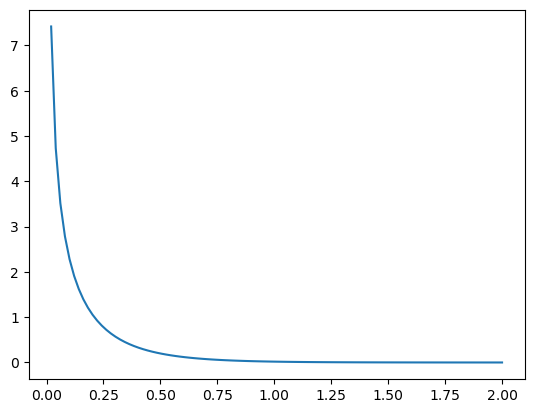

In [773]:
# 고객별 lambda (구매율)의 분포   

from scipy.stats import gamma  
import matplotlib.pyplot as plt  

coefs = lifetimes_model.summary['coef']  

x = np.linspace(0,2,100)  
y = gamma.pdf(x, a=coefs['r'], scale=1/coefs['alpha'])  

plt.plot(x,y)

### **2-4. 인사이트 : 3개월 내 가장 많이 거래할 고객 추출**

90일(약 3개월) 동안의 예상 거래횟수가 많은 고객순으로 정렬하면  
다음과 같이 () 행 고객이 가장 많이 거래할 것으로 예상되며 그 횟수는 ()번으로 에상된다.   


In [774]:
t = 90
train_RFTM['predicted_transactions'] = lifetimes_model.conditional_expected_number_of_purchases_up_to_time(t,
                                                        train_RFTM['Frequency'],
                                                        train_RFTM['Recency'],
                                                        train_RFTM['Time'])  

train_RFTM.sort_values(by='predicted_transactions', ascending= False).head(5) 

,cust_no,Frequency,Recency,Time,last_Date,first_Date,Monetary,이탈여부,I1,I2,I5,I7,I11,I16,I17,I18,I19,I20,X2_mean,X3_mean,X4_mean,X5_mean,X7_mean,ltv,predicted_transactions
46737,0xb2d625b4,2158.00,183,184,2019-09-30 16:49:00,2019-03-31,4482.46,1.00,1.00,61.00,판매원,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,4482.46,0.00,0.00,0.00,2392761.49,982.11
28676,0xb2d6e7c9,1072.00,94,95,2019-09-30 17:38:00,2019-06-28,848566.55,1.00,1.00,29.00,서비스직,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,798088.73,0.00,0.00,0.00,425795439.71,922.95
87661,0xb2d6929e,1213.00,95,96,2019-12-31 22:52:00,2019-09-27,6267.44,1.00,1.00,34.00,서비스직,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,6267.44,0.00,0.00,0.00,3143283.85,922.52
14759,0xb2d412d0,1007.00,96,97,2019-09-30 22:51:00,2019-06-26,37802.67,1.00,1.00,36.00,판매원,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,37802.67,0.00,0.00,0.00,17994236.74,875.52
34152,0xb2d6929e,942.00,96,97,2019-09-30 16:22:00,2019-06-26,5346.73,1.00,1.00,34.00,서비스직,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,5346.73,0.00,0.00,0.00,2406995.65,828.00


### **2-5. 인사이트 : 예상 평균 거래 금액이 가장 높은 고객 추출**  

() 행, ()번 고객이 평균 거래 금액수가 가장 높을 것으로 예상된다. 

In [775]:

# 예상 평균 구매금액 
train_RFTM['predicted_monetary_value'] = spend_model.conditional_expected_average_profit(train_RFTM['Frequency']
                                                                                      ,train_RFTM['Monetary'])

# LTV 해석
train_RFTM.sort_values(by='predicted_monetary_value', ascending= False).head(5)                                          
                                    

,cust_no,Frequency,Recency,Time,last_Date,first_Date,Monetary,이탈여부,I1,I2,I5,I7,I11,I16,I17,I18,I19,I20,X2_mean,X3_mean,X4_mean,X5_mean,X7_mean,ltv,predicted_transactions,predicted_monetary_value
46145,0x3b9aeb08,17.00,233,240,2019-09-24 10:23:00,2019-02-03,108768144.78,1.00,0.00,51.00,프리랜서,0.00,0.00,1.00,1.00,1.00,1.00,0.00,214657980.00,2878309.55,0.00,72296580.00,72296580.00,390587421.39,6.44,111585961.87
47919,0xb2d26881,2.00,636,638,2019-09-29 15:36:00,2018-01-01,82533840.12,1.00,1.00,54.00,사무원,0.00,0.00,1.00,1.00,1.00,1.00,0.00,137548927.32,7472.88,0.00,68774463.66,68774463.66,19735839.70,0.35,105091216.41
68964,0xb2d25ed7,16.00,545,552,2019-12-25 14:55:00,2018-06-28,88615089.65,1.00,1.00,29.00,판매원,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,7372786.20,0.00,0.00,0.00,131872064.05,2.67,91058247.16
95696,0xb2d1151e,9.00,271,273,2019-12-30 17:56:00,2019-04-03,62448194.21,1.00,1.00,53.00,서비스직,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,5806388.42,0.00,0.00,0.00,109583557.68,3.08,65576111.98
42331,0xb2d3f682,26.00,106,120,2019-09-17 10:24:00,2019-06-03,54169196.88,-1.00,1.00,31.00,프리랜서,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,5060.44,0.00,0.00,0.00,574308247.40,19.19,55078611.26


## LTV segmentation

In [784]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))  
scaler.fit(train_RFTM[['ltv']])  
train_RFTM['scaled_ltv'] = scaler.transform(train_RFTM[['ltv']])   

train_RFTM["segment"] = pd.qcut(train_RFTM["scaled_ltv"], 4, labels=["4등급", "3등급", "2등급", "1등급"])

MinMaxScaler()

In [787]:
train_RFTM.head()

,cust_no,Frequency,Recency,Time,last_Date,first_Date,Monetary,이탈여부,I1,I2,I5,I7,I11,I16,I17,I18,I19,I20,X2_mean,X3_mean,X4_mean,X5_mean,X7_mean,ltv,predicted_transactions,predicted_monetary_value,scaled_ltv,segment
0,0xb2d30bf6,3.00,149,169,2019-09-11 18:00:00,2019-04-15,19455.15,1.00,1.00,58.00,서비스직,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,19455.15,0.00,0.00,0.00,22237.11,1.80,22704.85,0.00,4등급
1,0xb2d0c143,21.00,342,354,2019-09-19 05:04:00,2018-10-12,71682.53,1.00,0.00,29.00,프리랜서,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,6698.39,0.00,0.00,0.00,214562.77,5.40,73178.58,0.00,2등급
3,0xb2d5a839,4.00,313,333,2019-09-11 15:40:00,2018-11-02,107453.08,1.00,0.00,29.00,판매원,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,14270.77,0.00,0.00,0.00,77995.24,1.19,120372.30,0.00,3등급
5,0xb2d6d3ac,4.00,127,155,2019-09-03 14:33:00,2019-04-29,167044.04,-1.00,1.00,48.00,프리랜서,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,167044.04,0.00,0.00,0.00,256905.29,2.53,187127.64,0.00,2등급
6,0xb2d58f97,55.00,286,293,2019-09-24 09:21:00,2018-12-12,2005.83,-1.00,0.00,28.00,전문직,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,2005.83,0.00,0.00,0.00,18462.13,16.81,2021.65,0.00,4등급


### **데이터 프레임 추출 for 첫 화면dashboard**

In [788]:
# 1. 전체 데이터 프레임 (for dashboard)

train_RFTM.rename(columns = {'I1' : '성별', 'I2' : '나이', 'I5' : '직업', 
                             'I7' : '보유 제품 수', 'I11' : '가구 연간 소득', 'I16' : 'VIP 여부', 
                             'I17' : '온라인 뱅킹 사용여부', 'I18' : '모바일 뱅킹 시용여부',
                             'I19' : '문자 사용 고객', 'I20': '위챗 사용 고객',
                             'X2_mean' : '정기 예금 평균잔액', 'X3_mean' : '입출금 통장 평균잔액', 'X4_mean' : '금융 상품 평균잔액',
                             'X5_mean' : '펀드 평균잔액', 'X7_mean' : '대출 평균잔액'},
                             inplace = True)  

train_RFTM.to_csv('./data/full_df(for dashboard).csv') 

In [791]:
train_RFTM.head()

,cust_no,Frequency,Recency,Time,last_Date,first_Date,Monetary,이탈여부,성별,나이,직업,보유 제품 수,가구 연간 소득,VIP 여부,온라인 뱅킹 사용여부,모바일 뱅킹 시용여부,문자 사용 고객,위챗 사용 고객,정기 예금 평균잔액,입출금 통장 평균잔액,금융 상품 평균잔액,펀드 평균잔액,대출 평균잔액,ltv,predicted_transactions,predicted_monetary_value,scaled_ltv,segment
0,0xb2d30bf6,3.00,149,169,2019-09-11 18:00:00,2019-04-15,19455.15,1.00,1.00,58.00,서비스직,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,19455.15,0.00,0.00,0.00,22237.11,1.80,22704.85,0.00,4등급
1,0xb2d0c143,21.00,342,354,2019-09-19 05:04:00,2018-10-12,71682.53,1.00,0.00,29.00,프리랜서,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,6698.39,0.00,0.00,0.00,214562.77,5.40,73178.58,0.00,2등급
3,0xb2d5a839,4.00,313,333,2019-09-11 15:40:00,2018-11-02,107453.08,1.00,0.00,29.00,판매원,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,14270.77,0.00,0.00,0.00,77995.24,1.19,120372.30,0.00,3등급
5,0xb2d6d3ac,4.00,127,155,2019-09-03 14:33:00,2019-04-29,167044.04,-1.00,1.00,48.00,프리랜서,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,167044.04,0.00,0.00,0.00,256905.29,2.53,187127.64,0.00,2등급
6,0xb2d58f97,55.00,286,293,2019-09-24 09:21:00,2018-12-12,2005.83,-1.00,0.00,28.00,전문직,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,2005.83,0.00,0.00,0.00,18462.13,16.81,2021.65,0.00,4등급


In [ ]:
# 1. RFM

final_RFM= train_RFTM[['cust_no',  'Recency', 'Frequency','Monetary']]  

final_RFM.head()  

final_RFM.to_csv('./data/RFM열.csv')  


In [ ]:
# 2. ltv 

final_LTV = train_RFTM[['cust_no', 'ltv']]  

final_LTV.head()  

final_LTV.to_csv('./data/ltv열.csv', index = False)


### **데이터 프레임 추출 for 개인 화면dashboard**

In [ ]:
# 3. 고객번호, ltv값, 등급 

final_LTV = train_RFTM[['cust_no', 'ltv', 'segment']]  

final_LTV.head()  

final_LTV.to_csv('./data/ltv+segment열.csv', index = False)

In [ ]:

# 3. 고객번호별 인구통계학적 정보 

final_LTV = train_RFTM[['cust_no', '성별’, '나이', '직업’, ‘보유 제품 수’, 
                        '가구 연간 소득’, 'VIP 여부’, '온라인 뱅킹 사용여부’, 
                        '모바일 뱅킹 시용여부’, ‘문자 사용 고객’, '위챗 사용 고객’]]


final_LTV.head()  

final_LTV.to_csv('./data/인구통계학적(I열).csv', index = False)

In [ ]:

# 4. 고객번호별 평균잔액(X열)  

final_LTV = train_RFTM[['정기 예금 평균잔액’,'입출금 통장 평균잔액’, '금융 상품 평균잔액’, '펀드 평균잔액’, '대출 평균잔액’]] 


final_LTV.head()  

final_LTV.to_csv('./data/평균잔액(X열).csv', index = False)

### label (이탈여부)와 ltv의 상관관계 

,ltv,label
ltv,1.00,-0.01
label,-0.01,1.00


,ltv,label
0,20282.93,1.00
1,212009.04,1.00
3,72934.90,1.00
5,240236.39,-1.00
6,18378.91,-1.00


<AxesSubplot:xlabel='label', ylabel='ltv'>

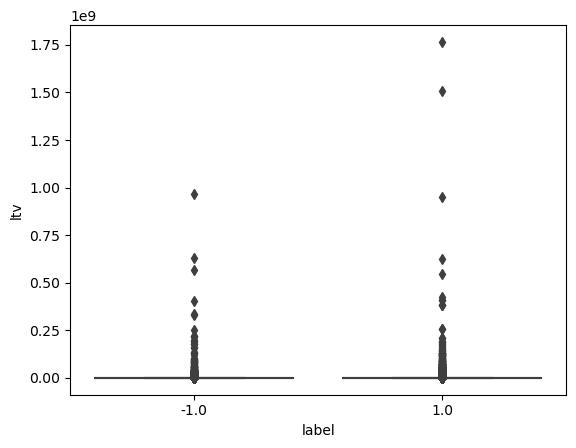

In [418]:
X = train_RFTM['이탈여부']
Y = train_RFTM['ltv']

train_corr = train_RFTM[['ltv', '이탈여부']]  

train_corr.corr()  

train_corr.head()  

import seaborn as sns 
sns.boxplot(x= X, y = Y)  
plt.show()

## **3. 한계점** 

- 온라인 구매데이터를 이용한 ltv(고객생애가치)계산원리를 금융고객의 거래데이터에 적용하고자 했으나, 결과적으로 ltv와 label(실제 이탈여부)의 상관관계가 유의미하지 않은것으로 보아 잘못 적용되었음을 알 수 있다. 

### **3-1. ltv가 label의 상관관계가 무의미하게 도출된 원인 분석**

- BG/NBD 모형과 Gamma-Gamma 모형에서 값을 에측할때, penalizer_coef 인자에 L2 penalty값을 최적화하는 과정을 생략해 최적화 계수값이 아닌 임의의 게수를 넣어 오차가 발생했을 확률이 높다.  
-> 정확한 최적화 계수를 예측할 수 없는 이유 : 그러나 최적화된 계수를 찾기 위해서는 고객마다 거래날짜 데이터가 필요했지만 마지막 거래날짜와 최초 거래날짜 데이터만 존재해서 lifetimes 패키지 함수에 적용할 수 없었다. 

- 만약, 최적화된 계수를 넣어도 ltv는 고객이탈에측에 무의미한 변수로 작용될 가능성이 매우 높다. 세번째 행 3777과 마지막 행 53065보면 frequency도, Recency도, monetary  모두 3번째 행이 훨씬 높아서 ltv가 높은건데, 결국 3번째 행 고객은 이탈했고, 마지막 행 고객은 이탈하지 않았다. 이를 통해 ltv를 에측해도 이탈할 고객은 이탈한다는 데이터 분석가님의 명언을 실감할 수 있었다.

### **데이터 분할**
- 검증(10000), 테스트(10000)

In [ ]:

# reset train df index
train = train.reset_index(drop=True)
data_size, *_ = train.shape
train_idx = list(np.random.choice(list(set(train.index)), data_size - 20000, replace = False))
valid_idx = list(np.random.choice(list(set(train.index) - set(train_idx)), 10000, replace = False))
test_idx = list(set(train.index) - set(train_idx) - set(valid_idx))
train_data = train.iloc[train_idx]
valid_data = train.iloc[valid_idx]
test_data  = train.iloc[test_idx]
print("train_data : ", train_data.shape)
print("valid_data : ",valid_data.shape)
print("test_data : ",test_data.shape)
set(train.index) - set(train_idx) - set(valid_idx) - set(test_idx)
train_data.to_csv('../data/preprocessed_data/train_data.csv', index = False)
valid_data.to_csv('../data/preprocessed_data/valid_data.csv', index = False)
test_data.to_csv('../data/preprocessed_data/test_data.csv', index = False)